# Goal of the notebook

In this notebook we calculate the efficency between the different technologies, for the different regions

## Import packages

In [55]:
import scanpy as sc
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
import pandas as pd
from xb.comparing import combine_med,median_calculator

# Specify the path to datasets

In [56]:
path = '../../figures/2.comparison_between_datasets/with_regional_anno_segmented/'
files=['anno_CosMx.h5ad',
 'anno_Hybriss.h5ad',
 'anno_MERFISH.h5ad',
 'anno_ResolveBio.h5ad',
 'anno_Vizgen.h5ad',
 'anno_Xenium.h5ad']

In [57]:
adata = sc.read(path+'anno_Xenium.h5ad')

In [58]:
adata_dict = {}
for file in files: 
    print(file)
    adata = sc.read(path+file)
    try:
        adata.X = adata.X.toarray()
    except: 
        print('nothing to format')
    adata.obs['x']=adata.obs['x_centroid']
    adata.obs['y']=adata.obs['y_centroid']
    sc.pp.calculate_qc_metrics(adata, percent_top=None, log1p=False, inplace=True)
    if file == 'anno_scRNAseq.h5ad':
        adata.var.index = adata.var.gene_symbol
    adata.var.index = adata.var.index.map(str.lower)
    adata_dict[file.split('.')[0]] = adata

anno_CosMx.h5ad
nothing to format
anno_Hybriss.h5ad
nothing to format
anno_MERFISH.h5ad
nothing to format
anno_ResolveBio.h5ad
nothing to format
anno_Vizgen.h5ad
nothing to format
anno_Xenium.h5ad
nothing to format


In [59]:
adata_dict['anno_Hybriss'].obs['spatial annotation']=adata_dict['anno_Hybriss'].obs['region_annotation']

In [60]:
adata_dict['anno_MERFISH']

AnnData object with n_obs × n_vars = 5889 × 268
    obs: 'x_centroid', 'y_centroid', 'y', 'x', 'region_annotation', 'spatial annotation', 'n_genes_by_counts', 'total_counts'
    var: 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [11]:
#reread single cell data since we need the updated version
adata_sc=sc.read('/media/sergio/xenium_b_and_heart/Xenium_benchmarking-main/data/scRNAseq/WMB-10Xv2-subset02_ready_for_xenium_benchmark.h5ad')

# Formatting single cell data

In [61]:
adata_dict['anno_scRNAseq']=adata_sc
adata_dict['anno_scRNAseq'].var.index=adata_dict['anno_scRNAseq'].var['gene_symbol'].map(str.lower)
adata_dict['anno_scRNAseq'].obs['spatial annotation']=adata_dict['anno_scRNAseq'].obs['anatomical_division_label_x']

# Identifying repeated genes across eperiments

In [62]:
repeated=[]
for variable in adata_dict['anno_scRNAseq'].var.index:
    #print(variable)
    rep=0
    for key in adata_dict.keys():
        if variable in adata_dict[key].var.index: 
            rep = rep+1
    repeated.append(rep)
import pandas as pd
df = pd.DataFrame(repeated)
df.index= adata_dict['anno_scRNAseq'].var.index

# We keep genes that are at least present in 3 datasets

In [63]:
df_filt = df[df[0] > 2]

In [64]:
dicti={'CosMx':'#FFA630', 'HybrISS':'#e82a92', 'ResolvedBiosciences':'#4DA1A9', 'Vizgen':'#2E5077', 'Xenium':'#56018f',
      'MERFISH_ABI':'#9EE493'}

In [65]:
color_dicitonary = {
'anno_scRNAseq': 'black',
 'anno_starmap': 'red',
 'anno_allen_smfish': 'purple',
 'anno_MERFISH': '#9EE493',
    'anno_Hybriss': '#e82a92',
 'anno_osmfish': 'yellow',
 'anno_exseq': 'brown',
 'anno_Vizgen': '#2E5077',
 'anno_baristaseq': 'orange',
 'anno_Xenium':'#56018f',
'anno_ResolveBio':'#4DA1A9', 
    'anno_CosMx':'#FFA630'}

In [66]:
minreads=1

Make a copy of adata_dict

In [67]:
adata_dict_all=adata_dict.copy()

Establish a consistent annotation of regions in ``spatial annotation``

In [68]:
for aa in  adata_dict_all.keys():
    try:
        print(aa)
        print(np.unique(adata_dict_all[aa].obs['spatial annotation'].astype(str)))
    except:
        print(aa)
        adata_dict_all[aa].obs['spatial annotation']=adata_dict_all[aa].obs['region_annotation']

anno_CosMx
['D:  CTXsp' 'D:  Fiber tracts' 'D: CA' 'D: CP' 'D: CTX' 'D: HYP' 'D: OLF'
 'D: THA' 'D: V3' 'D: VL' 'D: sAMY' 'None']
anno_Hybriss
['CP' 'GPe' 'L1' 'L2/3' 'L4' 'L5' 'L6a' 'L6b' 'LD' 'LM' 'MD' 'None' 'PO'
 'RT' 'VAL' 'VPL' 'VPM' 'alv' 'cc' 'cimg' 'fi' 'int' 'mo' 'po' 'sg' 'slm'
 'so' 'sp' 'sr' 'st']
anno_MERFISH
['L2/3' 'L4' 'L5' 'L6a' 'L6b' 'None']
anno_ResolveBio
['D: CP' 'D: CTX' 'D: CTXsp' 'D: Fiber tracts' 'D: HPF' 'D: HY' 'D: TH'
 'D: VL' 'D: sAMY' 'None']
anno_Vizgen
['D: CTX' 'D: CTX [1]' 'D: HYP' 'D: HYP [1]' 'D: THA' 'None']
anno_Xenium
['D: AUD1' 'D: AUD1 [1]' 'D: AUD2' 'D: AUD2 [1]' 'D: AUD2/3'
 'D: AUD2/3 [1]' 'D: AUD4' 'D: AUD4 [1]' 'D: AUD5' 'D: AUD5 [1]'
 'D: AUD6a' 'D: AUD6a [1]' 'D: AUD6b' 'D: AUD6b [1]' 'D: BLA/BMA'
 'D: BLA/BMA  [1]' 'D: CA1-slm' 'D: CA1-slm [1]' 'D: CA1-so'
 'D: CA1-so [1]' 'D: CA1-sp' 'D: CA1-sp [1]' 'D: CA1-sr' 'D: CA1-sr [1]'
 'D: CA2-slm' 'D: CA2-slm [1]' 'D: CA2-so' 'D: CA2-so [1]' 'D: CA2-sp'
 'D: CA2-sp [1]' 'D: CA2-sr' 'D: CA2-sr

# REGION 1: CORTEX

# First, we analyze the Cortex subset

We remve the [1] in the annotation terms of Xenium, since these are essentially indicating duplicated regions in a tissue. They should be considered all together

In [69]:
adata_dict_all['anno_Xenium'].obs.loc[:,'spatial annotation']=[d.replace('D:','').replace('[1]','').replace(' ','') for d in  adata_dict_all['anno_Xenium'].obs.loc[:,'region_annotation']]

We specify cortical regions annotated to consider in the analysis

In [70]:
cortical_clusters=['D: CTX','L1', 'L2/3', 'L4', 'L5' ,'L6a' ,'L6b','L1', 'L2/3', 'L4', 'L5' ,'L6a', 'L6b',
 'AUD1', 'AUD2' ,'AUD2/3', 'AUD4', 'AUD5', 'AUD6a', 'AUD6b', 'MO1', 'MO2', 'MO2-3' ,'MO5','MO6a', 'MO6b',
'SSp1', 'SSp2', 'SSp2/3', 'SSp4', 'SSp5', 'SSp6a', 'SSp6b','Isocortex','D: CTX','D: CTX [1]']

We next plot the regions to confirm we are analyzing the same part of the tissues spatially

anno_CosMx


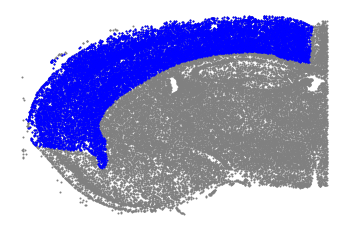

anno_Hybriss


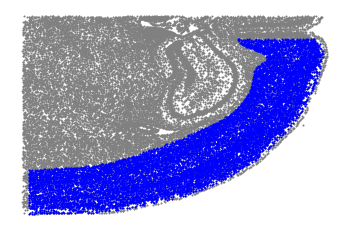

anno_MERFISH


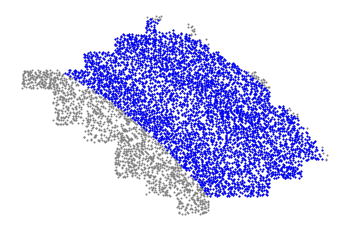

anno_ResolveBio


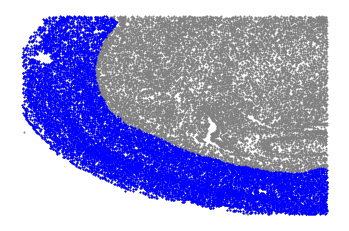

anno_Vizgen


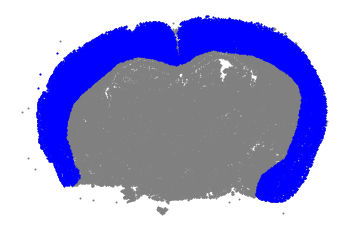

anno_Xenium


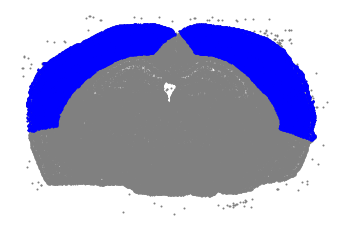

anno_scRNAseq


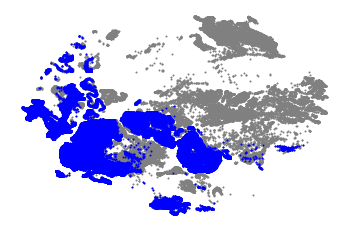

In [71]:
for aa in  adata_dict_all.keys():
    try:
        print(aa)
        adata_dict[aa]=adata_dict_all[aa][adata_dict_all[aa].obs['spatial annotation'].astype(str).isin(cortical_clusters)]
        plt.figure()
        plt.scatter(adata_dict_all[aa].obs['x'],adata_dict_all[aa].obs['y'],c='grey',s=1)
        plt.scatter(adata_dict[aa].obs['x'],adata_dict[aa].obs['y'],c='blue',s=1)
        plt.axis('off')
        plt.savefig('../../figures/2.comparison_between_datasets/ratios_vs_sc/ROI_CTX_'+str(aa)+'.png')
        plt.show()
        #plt.show()
    except:
        print('not possible')

# We explore the Number of genes per dataset

In [72]:
datasetslist=list(adata_dict_all.keys())
ngenes=[]
for num0 in range(0,len(datasetslist[:])):
        import matplotlib
        matplotlib.rcParams['pdf.fonttype'] = 42
        matplotlib.rcParams['ps.fonttype'] = 42
        k0=datasetslist[num0]
        d0=adata_dict_all[k0].copy()
        ngenes.append(d0.shape[1])

/home/sergio/anaconda3/envs/xb/lib/python3.7/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/sergio/anaconda3/envs/xb/lib/python3.7/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [73]:
resu=pd.DataFrame([datasetslist,ngenes]).transpose().sort_values(by=1)

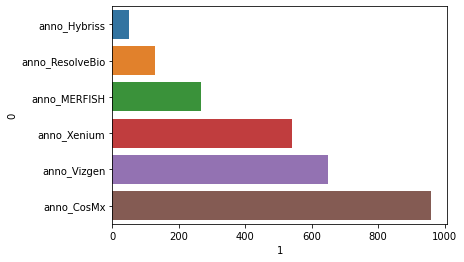

In [74]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
plt.figsize=(2,5)
sns.barplot(y=resu[0][:-1],x=resu[1][:-1])
plt.savefig('../../figures/2.comparison_between_datasets/method_vs_method_efficiency/genes_in_panel.pdf')

We next Calculate total counts per 10k cells for common genes. Paired comparisons

Median anno_CosMx_anno_Hybriss5.031268002108411
Median anno_CosMx_anno_MERFISH1.080017915485379
Median anno_CosMx_anno_ResolveBio0.48082484971423817
Median anno_CosMx_anno_Vizgen0.7481089167636303
Median anno_CosMx_anno_Xenium0.4008696157484479
Median anno_Hybriss_anno_CosMx0.1987570528107305
Median anno_Hybriss_anno_MERFISH0.13963330448400924
Median anno_Hybriss_anno_ResolveBio0.1184790228535648
Median anno_Hybriss_anno_Vizgen0.10323682620963703
Median anno_Hybriss_anno_Xenium0.1796534908779807
Median anno_MERFISH_anno_CosMx0.9259105665396138
Median anno_MERFISH_anno_Hybriss7.161615229943367
Median anno_MERFISH_anno_ResolveBio0.6202750891492613
Median anno_MERFISH_anno_Vizgen1.3482021718393598
Median anno_MERFISH_anno_Xenium0.3295311853492609
Median anno_ResolveBio_anno_CosMx2.0796893390196223
Median anno_ResolveBio_anno_Hybriss8.425589155577436
Median anno_ResolveBio_anno_MERFISH1.6121879106438897
Median anno_ResolveBio_anno_Vizgen0.9079480337704776
Median anno_ResolveBio_anno_Xenium

/home/sergio/anaconda3/envs/xb/lib/python3.7/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/sergio/anaconda3/envs/xb/lib/python3.7/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Median anno_scRNAseq_anno_CosMx2.2753018360952537


/home/sergio/anaconda3/envs/xb/lib/python3.7/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/sergio/anaconda3/envs/xb/lib/python3.7/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Median anno_scRNAseq_anno_Hybriss3.365834013118829


/home/sergio/anaconda3/envs/xb/lib/python3.7/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/sergio/anaconda3/envs/xb/lib/python3.7/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Median anno_scRNAseq_anno_MERFISH1.6191226109680357


/home/sergio/anaconda3/envs/xb/lib/python3.7/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/sergio/anaconda3/envs/xb/lib/python3.7/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Median anno_scRNAseq_anno_ResolveBio1.0671399593642847


/home/sergio/anaconda3/envs/xb/lib/python3.7/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/sergio/anaconda3/envs/xb/lib/python3.7/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Median anno_scRNAseq_anno_Vizgen0.37569903260480114


/home/sergio/anaconda3/envs/xb/lib/python3.7/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/sergio/anaconda3/envs/xb/lib/python3.7/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Median anno_scRNAseq_anno_Xenium0.8113868613181024


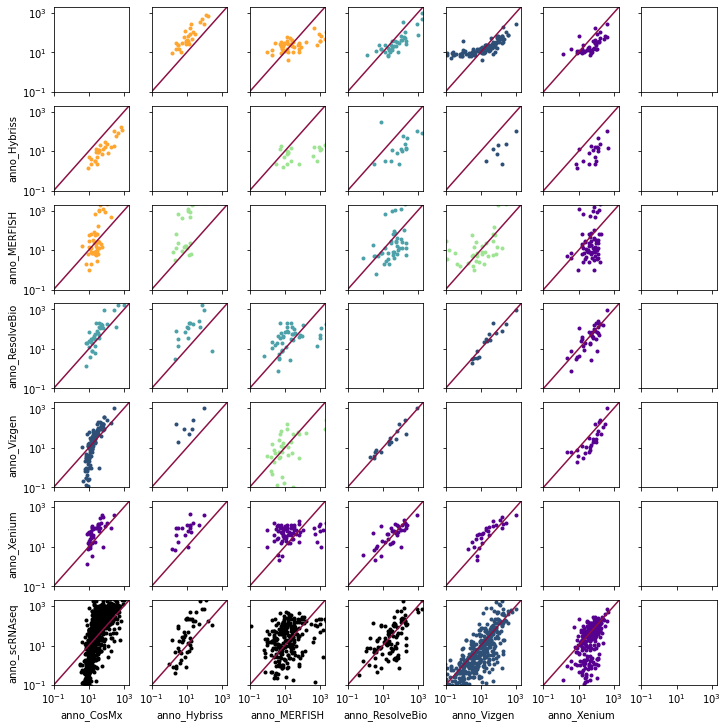

In [75]:
datasetslist=list(adata_dict_all.keys())
fig,axs=plt.subplots(len(datasetslist),len(datasetslist),figsize=(10,10),constrained_layout = True,sharex=True,sharey=True)
for num0 in range(0,len(datasetslist[:])):
    for num1 in range(0,len(datasetslist[:-1])):
        if num0!=num1:
            import matplotlib
            matplotlib.rcParams['pdf.fonttype'] = 42
            matplotlib.rcParams['ps.fonttype'] = 42
            k0=datasetslist[num0]
            k1=datasetslist[num1]
            d0=adata_dict_all[k0].copy()
            d1=adata_dict_all[k1].copy()
            if k1=='anno_scRNAseq':
                d1=d1[:,~d1.var.index.duplicated()]
            if k0=='anno_scRNAseq':
                d0=d0[:,~d0.var.index.duplicated()]
            commong=d0.var.index[d0.var.index.isin(d1.var.index)]
            d0=d0[:,commong]
            d1=d1[:,commong]
            comn=100
            summ=pd.DataFrame([np.mean(d0.to_df())*comn,np.mean(d1.to_df())*comn],index=[k0,k1]).transpose()
            k0_over_k1_efficiency=np.mean(summ[k1]/summ[k0])
            k0_over_k1_efficiency_med=np.median(summ[k1]/summ[k0])
            if k0_over_k1_efficiency_med>1:
                coltouse=color_dicitonary[k1]
            else:
                coltouse=color_dicitonary[k0]
            sns.scatterplot(x=k1, y=k0,edgecolor='black',
                    linewidth=0,s = 16,color=coltouse,
                       data=summ,ax=axs[num0,num1])
            print('Median '+str(k0)+'_'+str(k1)+str(1/k0_over_k1_efficiency_med))
            x = np.linspace(0.1,2000)
            y = 1*x
            axs[num0,num1].plot(x, y,color='#8c1044')

plt.xlim(0.1,2000)
plt.ylim(0.1,2000)
plt.xscale('log')
plt.yscale('log')
plt.savefig('../../figures/2.comparison_between_datasets/method_vs_method_efficiency/all_with_subplots.pdf')

We check the xenium vs single cell plot

/home/sergio/anaconda3/envs/xb/lib/python3.7/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/sergio/anaconda3/envs/xb/lib/python3.7/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Median anno_Xenium_anno_scRNAseq1.232397056206184


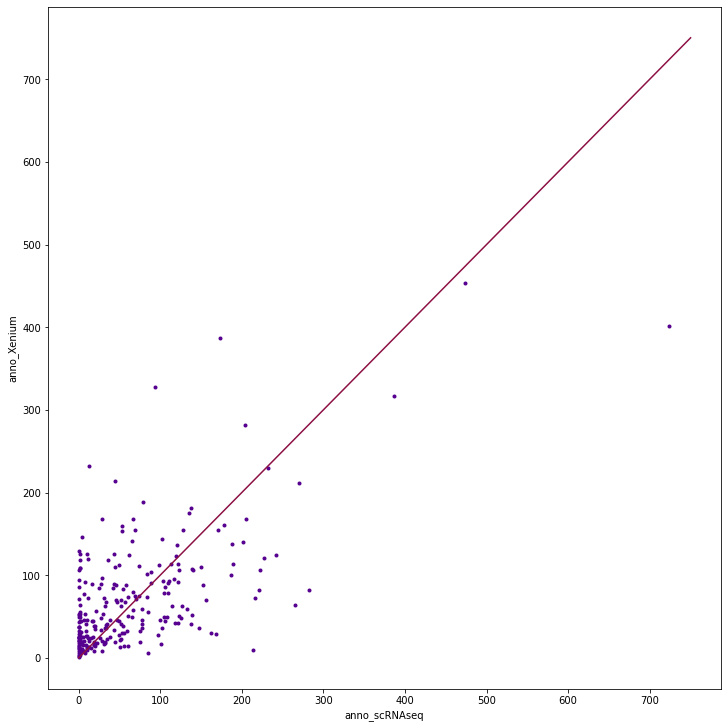

In [76]:
datasetslist=list(adata_dict_all.keys())
fig,axs=plt.subplots(1,1,figsize=(10,10),constrained_layout = True,sharex=True,sharey=True)
for num0 in range(5,6):
    for num1 in range(6,7):
        if num0!=num1:
            import matplotlib
            matplotlib.rcParams['pdf.fonttype'] = 42
            matplotlib.rcParams['ps.fonttype'] = 42
            k0=datasetslist[num0]
            k1=datasetslist[num1]
            d0=adata_dict_all[k0].copy()
            d1=adata_dict_all[k1].copy()
            if k1=='anno_scRNAseq':
                d1=d1[:,~d1.var.index.duplicated()]
            if k0=='anno_scRNAseq':
                d0=d0[:,~d0.var.index.duplicated()]
            commong=d0.var.index[d0.var.index.isin(d1.var.index)]
            d0=d0[:,commong]
            d1=d1[:,commong]
            comn=100
            summ=pd.DataFrame([np.mean(d0.to_df())*comn,np.mean(d1.to_df())*comn],index=[k0,k1]).transpose()
            k0_over_k1_efficiency=np.mean(summ[k1]/summ[k0])
            k0_over_k1_efficiency_med=np.median(summ[k1]/summ[k0])
            if k0_over_k1_efficiency_med>1:
                coltouse=color_dicitonary[k1]
            else:
                coltouse=color_dicitonary[k0]
            sns.scatterplot(x=k1, y=k0,edgecolor='black',
                    linewidth=0,s = 16,color=coltouse,
                       data=summ)
            print('Median '+str(k0)+'_'+str(k1)+str(1/k0_over_k1_efficiency_med))
            x = np.linspace(0.1,750)
            y = 1*x
            plt.plot(x, y,color='#8c1044') 

Next we save this results to a csv for the xenium-scRNAseq comparison in the cortex

In [77]:
summ.to_csv('../../figures/2.comparison_between_datasets/ratios_vs_sc/ratios_allcounts_scRNAseq_xenium_cortex.csv')

We explore the number of probes included in xenium datasets vs the detection efficiency ratio

Correlation probesets vs scRNAseq levels:
-0.22381044886124776
Correlation probesets vs ST/scRNAseq ratio:
-0.37490663964559773
Correlation probesets vs Xenium levels levels:
-0.07716812524474112
Correlation probes vs scRNAseq levels:
0.023345161552017386
Correlation probes vs ST/scRNAseq ratio:
-0.20262506306322664
Correlation probes vs Xenium levels levels:
0.0030772456695792243


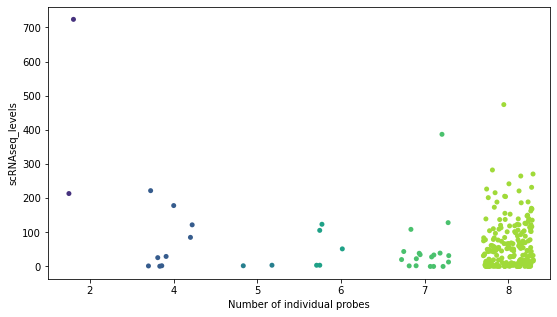

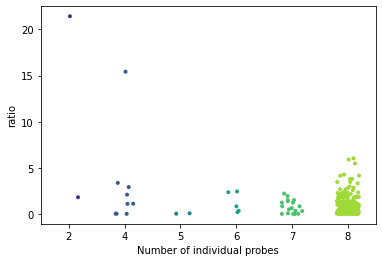

In [78]:
summ['ratio']=summ.iloc[:,1]/summ.iloc[:,0]
df_Xenium=summ
PLPs_xenium=pd.read_csv('../../data/annotation_dictionaries/mBrain_v1_panel_nprobes.csv',header=None)
PLPs_xenium.columns=['Gene','ID','nprobes','sets','celltype']
PLPs_xenium['Gene']=[g.lower() for g in PLPs_xenium['Gene']]
nprobedic=dict(zip(PLPs_xenium['Gene'],PLPs_xenium['nprobes']))
PLPs_xenium=pd.read_csv('../../data/annotation_dictionaries/mBrain_v1_panel_nprobes_real_sequences.csv')
#PLPs_xenium.columns=['Gene','ID','nprobes','sets','celltype']
PLPs_xenium['gene']=[g.lower() for g in PLPs_xenium['gene']]
nprobedic_all=dict(zip(PLPs_xenium['gene'],PLPs_xenium['nprobes']))
df_Xenium['total_probes']=df_Xenium.index.map(nprobedic_all)
df_Xenium['total_probesets']=df_Xenium.index.map(nprobedic)

df_Xenium=df_Xenium[df_Xenium['anno_scRNAseq']!=0]
df_Xenium=df_Xenium[df_Xenium['anno_Xenium']!=0]
df_Xenium=df_Xenium[~df_Xenium['total_probes'].isna()]
plt.figure(figsize=(9,5))
sns.stripplot(x=df_Xenium['total_probesets'].astype(int),y=df_Xenium['anno_scRNAseq'].astype(float),palette='viridis',jitter=0.3)
plt.xlabel('Number of individual probes')
plt.ylabel('scRNAseq_levels')


print('Correlation probesets vs scRNAseq levels:')
print(np.corrcoef(df_Xenium['total_probesets'],df_Xenium['anno_scRNAseq'])[0,1])
print('Correlation probesets vs ST/scRNAseq ratio:')
print(np.corrcoef(df_Xenium['total_probesets'],df_Xenium['ratio'])[0,1])
print('Correlation probesets vs Xenium levels levels:')
print(np.corrcoef(df_Xenium['total_probesets'],df_Xenium['anno_Xenium'])[0,1])

plt.figure()
sns.stripplot(x=df_Xenium['total_probesets'].astype(int),y=df_Xenium['ratio'].astype(float),palette='viridis',jitter=0.2,s=4)
plt.xlabel('Number of individual probes')
plt.ylabel('ratio')

print('Correlation probes vs scRNAseq levels:')
print(np.corrcoef(df_Xenium['total_probes'],df_Xenium['anno_scRNAseq'])[0,1])
print('Correlation probes vs ST/scRNAseq ratio:')
print(np.corrcoef(df_Xenium['total_probes'],df_Xenium['ratio'])[0,1])
print('Correlation probes vs Xenium levels levels:')
print(np.corrcoef(df_Xenium['total_probes'],df_Xenium['anno_Xenium'])[0,1])


## IMPORTANT STEP: This line calculates the median for gene, compared to single cell

In [83]:
adata_dict['anno_MERFISH'].var.index

Index(['1700022i11rik', '1810046k07rik', '5031425f14rik', '5730522e02rik',
       'acta2', 'adam2', 'adamts2', 'adamts4', 'adra1b', 'alk',
       ...
       'unc5b', 'unc5d', 'ust', 'vip', 'vipr2', 'vtn', 'vwc2', 'wipf3',
       'wnt7b', 'zfp804b'],
      dtype='object', name='gene', length=268)

In [86]:
means,genes_s=median_calculator(adata_dict,df_filt)

0it [00:00, ?it/s]

oprk1
(193380, 1)


1it [00:11, 11.35s/it]

satb2
(193380, 1)


2it [00:22, 11.32s/it]

nrp2
(193380, 1)


3it [00:33, 11.32s/it]

fn1
(193380, 1)


4it [00:46, 11.76s/it]

igfbp5
(193380, 1)


5it [00:58, 11.82s/it]

epha4
(193380, 1)


6it [01:09, 11.70s/it]

dner
(193380, 1)


7it [01:22, 12.11s/it]

ramp1
(193380, 1)


8it [01:34, 11.91s/it]

cntnap5b
(193380, 1)


9it [01:46, 12.00s/it]

cdh20
(193380, 1)


10it [01:58, 12.07s/it]

rnf152
(193380, 1)


/home/sergio/anaconda3/envs/xb/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3438: RuntimeWarning: Mean of empty slice.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/home/sergio/anaconda3/envs/xb/lib/python3.7/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
11it [02:10, 11.85s/it]

tmem163
(193380, 1)


12it [02:22, 11.99s/it]

avpr1b


13it [02:26,  9.75s/it]

adora1
(193380, 1)


14it [02:38, 10.35s/it]

gpr37l1
(193380, 1)


15it [02:50, 10.82s/it]

ptgs2
(193380, 1)


16it [03:03, 11.34s/it]

rgs5
(193380, 1)


17it [03:14, 11.41s/it]

opn3
(193380, 1)


18it [03:27, 11.84s/it]

prox1
(193380, 1)


19it [03:39, 11.84s/it]

mrc1
(193380, 1)


20it [03:52, 12.20s/it]

gpr158
(193380, 1)


21it [04:04, 12.03s/it]

gad2
(193380, 1)


22it [04:16, 12.27s/it]

lhx6
(193380, 1)


23it [04:28, 12.03s/it]

nr4a2
(193380, 1)


24it [04:41, 12.30s/it]

tbr1
(193380, 1)


25it [04:52, 12.02s/it]

cobll1
(193380, 1)


26it [05:05, 12.32s/it]

gad1
(193380, 1)


27it [05:17, 12.08s/it]

pde11a
(193380, 1)


28it [05:29, 12.20s/it]

pde1a
(193380, 1)


29it [05:42, 12.30s/it]

aplnr
(193380, 1)


30it [05:53, 12.06s/it]

spi1
(193380, 1)


31it [06:06, 12.33s/it]

cd44
(193380, 1)


32it [06:17, 12.04s/it]

bdnf
(193380, 1)


33it [06:29, 12.01s/it]

lgr4
(193380, 1)


34it [06:42, 12.15s/it]

chrm5


35it [06:46,  9.66s/it]

meis2
(193380, 1)


36it [06:58, 10.43s/it]

mertk
(193380, 1)


37it [07:10, 10.96s/it]

pdyn
(193380, 1)


38it [07:22, 11.34s/it]

adra1d
(193380, 1)


39it [07:35, 11.61s/it]

prokr2
(193380, 1)


40it [07:47, 11.79s/it]

lamp5
(193380, 1)


41it [07:59, 11.92s/it]

snap25
(193380, 1)


42it [08:11, 12.01s/it]

sstr4


43it [08:16,  9.77s/it]

syndig1
(193380, 1)


44it [08:27, 10.31s/it]

slc32a1
(193380, 1)


45it [08:40, 10.88s/it]

sulf2
(193380, 1)


46it [08:52, 11.27s/it]

tshz2
(193380, 1)


47it [09:04, 11.55s/it]

cbln4
(193380, 1)


48it [09:16, 11.75s/it]

mc3r
(193380, 1)


49it [09:28, 11.89s/it]

ntsr1
(193380, 1)


50it [09:41, 11.98s/it]

crh
(193380, 1)


51it [09:53, 12.05s/it]

agtr1b
(193380, 1)


52it [10:05, 12.10s/it]

trpc4
(193380, 1)


53it [10:17, 11.94s/it]

p2ry14
(193380, 1)


54it [10:29, 12.22s/it]

p2ry12
(193380, 1)


55it [10:41, 11.96s/it]

plch1
(193380, 1)


56it [10:53, 12.14s/it]

rxfp1
(193380, 1)


57it [11:05, 12.07s/it]

npy2r
(193380, 1)


58it [11:18, 12.12s/it]

ntrk1


59it [11:22,  9.72s/it]

ctss
(193380, 1)


60it [11:34, 10.38s/it]

syt6
(193380, 1)


61it [11:46, 10.93s/it]

ndst4
(193380, 1)


62it [11:58, 11.30s/it]

camk2d
(193380, 1)


63it [12:10, 11.37s/it]

npnt
(193380, 1)


64it [12:22, 11.81s/it]

emcn
(193380, 1)


65it [12:34, 11.68s/it]

col24a1
(193380, 1)


66it [12:46, 11.96s/it]

lpar3
(193380, 1)


67it [12:58, 11.90s/it]

adgrl2
(193380, 1)


68it [13:10, 11.96s/it]

adgrl4
(193380, 1)


69it [13:23, 12.07s/it]

slc44a5
(193380, 1)


70it [13:35, 12.11s/it]

ptger3
(193380, 1)


71it [13:47, 12.13s/it]

penk
(193380, 1)


72it [13:58, 11.96s/it]

tox
(193380, 1)


73it [14:11, 12.23s/it]

calb1
(193380, 1)


74it [14:23, 11.97s/it]

epha7
(193380, 1)


75it [14:35, 12.17s/it]

cnr1
(193380, 1)


76it [14:47, 12.05s/it]

gabbr2
(193380, 1)


77it [14:59, 12.10s/it]

lpar1
(193380, 1)


78it [15:11, 12.12s/it]

ror1
(193380, 1)


79it [15:24, 12.15s/it]

rab3b
(193380, 1)


80it [15:36, 12.16s/it]

pou3f1
(193380, 1)


81it [15:48, 12.18s/it]

rspo1
(193380, 1)


82it [16:00, 12.18s/it]

oprd1
(193380, 1)


83it [16:13, 12.19s/it]

c1qb
(193380, 1)


84it [16:25, 12.18s/it]

c1qa
(193380, 1)


85it [16:37, 12.18s/it]

htr6
(193380, 1)


86it [16:49, 12.18s/it]

grm3
(193380, 1)


87it [17:00, 11.93s/it]

sema3e
(193380, 1)


88it [17:13, 12.01s/it]

reln
(193380, 1)


89it [17:25, 12.06s/it]

otof
(193380, 1)


90it [17:37, 12.09s/it]

slit2
(193380, 1)


91it [17:49, 12.12s/it]

cckar


92it [17:53,  9.64s/it]

pdgfra
(193380, 1)


93it [18:05, 10.46s/it]

kit
(193380, 1)


94it [18:18, 11.10s/it]

kdr
(193380, 1)


95it [18:30, 11.49s/it]

adgrl3
(193380, 1)


96it [18:43, 11.81s/it]

parm1
(193380, 1)


97it [18:55, 11.97s/it]

prdm8
(193380, 1)


98it [19:07, 12.03s/it]

spp1
(193380, 1)


99it [19:19, 11.89s/it]

selplg
(193380, 1)


100it [19:32, 12.18s/it]

nos1
(193380, 1)


101it [19:43, 11.93s/it]

cux2
(193380, 1)


102it [19:56, 12.08s/it]

gjc3
(193380, 1)


103it [20:08, 12.05s/it]

flt1
(193380, 1)


104it [20:19, 11.90s/it]

rxfp2
(193380, 1)


105it [20:32, 12.19s/it]

calcr
(193380, 1)


106it [20:44, 12.02s/it]

thsd7a
(193380, 1)


107it [20:56, 12.27s/it]

foxp2
(193380, 1)


108it [21:08, 12.05s/it]

gpr37
(193380, 1)


109it [21:21, 12.29s/it]

grm8
(193380, 1)


110it [21:32, 12.07s/it]

chrm2
(193380, 1)


111it [21:45, 12.30s/it]

npy
(193380, 1)


112it [21:57, 12.01s/it]

crhr2
(193380, 1)


113it [22:09, 12.16s/it]

tacr1
(193380, 1)


114it [22:21, 12.09s/it]

aldh1l1
(193380, 1)


115it [22:33, 12.12s/it]

grm7
(193380, 1)


116it [22:45, 12.15s/it]

slc6a1
(193380, 1)


117it [22:58, 12.16s/it]

ret
(193380, 1)


118it [23:10, 12.18s/it]

grin2b
(193380, 1)


119it [23:22, 12.20s/it]

kcnj8
(193380, 1)


120it [23:34, 12.19s/it]

itpr2
(193380, 1)


121it [23:46, 12.18s/it]

pthlh
(193380, 1)


122it [23:59, 12.19s/it]

c5ar1
(193380, 1)


123it [24:11, 12.19s/it]

axl
(193380, 1)


124it [24:23, 12.19s/it]

slc17a7
(193380, 1)


125it [24:35, 12.03s/it]

mrgprx2


126it [24:39,  9.76s/it]

slc17a6
(193380, 1)


127it [24:51, 10.49s/it]

igf1r
(193380, 1)


128it [25:03, 10.75s/it]

nr2f2
(193380, 1)


129it [25:16, 11.43s/it]

ntrk3
(193380, 1)


130it [25:27, 11.42s/it]

mfge8
(193380, 1)


131it [25:40, 11.74s/it]

grm5
(193380, 1)


132it [25:52, 11.81s/it]

cckbr
(193380, 1)


133it [26:04, 11.93s/it]

dkk3
(193380, 1)


134it [26:16, 12.02s/it]

sox6
(193380, 1)


135it [26:28, 12.06s/it]

fgfr2
(193380, 1)


136it [26:40, 12.10s/it]

drd4
(193380, 1)


137it [26:53, 12.13s/it]

igf2
(193380, 1)


138it [27:05, 12.15s/it]

th
(193380, 1)


139it [27:17, 12.17s/it]

insr
(193380, 1)


140it [27:29, 12.18s/it]

npy1r
(193380, 1)


141it [27:41, 12.19s/it]

lpl
(193380, 1)


142it [27:54, 12.21s/it]

lpar2
(193380, 1)


143it [28:06, 12.22s/it]

ednra
(193380, 1)


144it [28:18, 12.22s/it]

inpp4b
(193380, 1)


145it [28:30, 12.01s/it]

adgrg1
(193380, 1)


146it [28:43, 12.29s/it]

calb2
(193380, 1)


147it [28:54, 12.08s/it]

cdh13
(193380, 1)


148it [29:07, 12.32s/it]

npsr1
(193380, 1)


149it [29:19, 12.09s/it]

dscaml1
(193380, 1)


150it [29:31, 12.30s/it]

htr3a
(193380, 1)


151it [29:43, 12.08s/it]

drd2
(193380, 1)


152it [29:56, 12.29s/it]

cspg4
(193380, 1)


153it [30:07, 12.02s/it]

cplx3
(193380, 1)


154it [30:20, 12.19s/it]

rora
(193380, 1)


155it [30:31, 12.08s/it]

unc13c
(193380, 1)


156it [30:44, 12.11s/it]

cspg5
(193380, 1)


157it [30:56, 12.14s/it]

cx3cr1
(193380, 1)


158it [31:08, 12.13s/it]

vipr1
(193380, 1)


159it [31:20, 12.17s/it]

vip
(193380, 1)


160it [31:32, 11.94s/it]

oprm1
(193380, 1)


161it [31:44, 12.02s/it]

grm1
(193380, 1)


162it [31:56, 12.08s/it]

ccn2
(193380, 1)


163it [32:08, 11.90s/it]

cd24a
(193380, 1)


164it [32:21, 12.21s/it]

pln
(193380, 1)


165it [32:32, 11.96s/it]

man1a
(193380, 1)


166it [32:44, 11.99s/it]

egr2
(193380, 1)


167it [32:56, 12.12s/it]

pcdh15
(193380, 1)


168it [33:08, 11.90s/it]

adora2a
(193380, 1)


169it [33:20, 12.06s/it]

slc17a8
(193380, 1)


170it [33:32, 12.04s/it]

dcn
(193380, 1)


171it [33:44, 11.90s/it]

lgr5
(193380, 1)


172it [33:57, 12.19s/it]

avpr1a
(193380, 1)


173it [34:08, 11.94s/it]

nxph4
(193380, 1)


174it [34:20, 12.08s/it]

tac2
(193380, 1)


175it [34:32, 12.04s/it]

egfr
(193380, 1)


176it [34:45, 12.09s/it]

adra1b
(193380, 1)


177it [34:57, 12.11s/it]

adamts2
(193380, 1)


178it [35:08, 11.93s/it]

glp2r
(193380, 1)


179it [35:21, 12.23s/it]

serpinf1
(193380, 1)


180it [35:32, 11.96s/it]

aldoc
(193380, 1)


181it [35:45, 12.10s/it]

vtn
(193380, 1)


182it [35:57, 12.05s/it]

col1a1
(193380, 1)


183it [36:09, 12.10s/it]

ppp1r1b
(193380, 1)


184it [36:21, 12.13s/it]

igfbp4
(193380, 1)


185it [36:33, 12.15s/it]

gfap
(193380, 1)


186it [36:46, 12.17s/it]

crhr1
(193380, 1)


187it [36:58, 12.18s/it]

pecam1
(193380, 1)


188it [37:10, 12.19s/it]

sox9
(193380, 1)


189it [37:22, 12.19s/it]

sstr2
(193380, 1)


190it [37:34, 12.20s/it]

cd300c2
(193380, 1)


191it [37:46, 12.01s/it]

galr2


192it [37:51,  9.76s/it]

foxj1
(193380, 1)


193it [38:03, 10.49s/it]

rbfox3
(193380, 1)


194it [38:14, 10.76s/it]

gcgr
(193380, 1)


195it [38:27, 11.44s/it]

ntsr2
(193380, 1)


196it [38:39, 11.43s/it]

id2
(193380, 1)


197it [38:51, 11.78s/it]

egln3
(193380, 1)


198it [39:03, 11.77s/it]

sstr1
(193380, 1)


199it [39:15, 11.90s/it]

rgs6
(193380, 1)


200it [39:27, 11.99s/it]

fos
(193380, 1)


201it [39:39, 11.84s/it]

bcl11b
(193380, 1)


202it [39:52, 12.15s/it]

dlk1
(193380, 1)


203it [40:03, 11.93s/it]

vipr2
(193380, 1)


204it [40:16, 12.14s/it]

itgb8
(193380, 1)


205it [40:27, 12.02s/it]

chrm3
(193380, 1)


206it [40:40, 12.08s/it]

agtr1a
(193380, 1)


207it [40:52, 12.10s/it]

nrn1
(193380, 1)


208it [41:04, 12.13s/it]

drd1
(193380, 1)


209it [41:16, 12.15s/it]

cxcl14
(193380, 1)


210it [41:28, 12.16s/it]

ntrk2
(193380, 1)


211it [41:41, 12.17s/it]

slc6a3
(193380, 1)


212it [41:53, 12.18s/it]

rasgrf2
(193380, 1)


213it [42:05, 12.18s/it]

hexb
(193380, 1)


214it [42:17, 12.19s/it]

cartpt
(193380, 1)


215it [42:29, 12.22s/it]

htr1a
(193380, 1)


216it [42:41, 12.01s/it]

fezf2
(193380, 1)


217it [42:54, 12.29s/it]

synpr
(193380, 1)


218it [43:06, 12.07s/it]

chat
(193380, 1)


219it [43:18, 12.32s/it]

sncg
(193380, 1)


220it [43:30, 12.04s/it]

fzd3
(193380, 1)


221it [43:42, 12.17s/it]

lpar6
(193380, 1)


222it [43:54, 12.10s/it]

htr2a
(193380, 1)


223it [44:06, 12.14s/it]

ednrb
(193380, 1)


224it [44:19, 12.15s/it]

plcxd3
(193380, 1)


225it [44:30, 11.97s/it]

cdh9
(193380, 1)


226it [44:43, 12.25s/it]

sema5a
(193380, 1)


227it [44:54, 12.00s/it]

trhr
(193380, 1)


228it [45:07, 12.20s/it]

deptor
(193380, 1)


229it [45:19, 12.07s/it]

pvalb
(193380, 1)


230it [45:31, 12.13s/it]

sox10
(193380, 1)


231it [45:43, 12.15s/it]

wnt7b
(193380, 1)


232it [45:56, 12.17s/it]

igfbp6
(193380, 1)


233it [46:08, 12.19s/it]

cldn5
(193380, 1)


234it [46:20, 12.21s/it]

sst
(193380, 1)


235it [46:32, 12.21s/it]

epha6
(193380, 1)


236it [46:44, 11.97s/it]

htr1f
(193380, 1)


237it [46:57, 12.30s/it]

chodl
(193380, 1)


238it [47:08, 12.02s/it]

grik1
(193380, 1)


239it [47:21, 12.17s/it]

olig2
(193380, 1)


240it [47:33, 12.10s/it]

olig1
(193380, 1)


241it [47:45, 12.14s/it]

pcp4
(193380, 1)


242it [47:57, 12.16s/it]

glp1r
(193380, 1)


243it [48:09, 12.18s/it]

mog
(193380, 1)


244it [48:21, 12.18s/it]

trem2
(193380, 1)


245it [48:34, 12.20s/it]

daam2
(193380, 1)


246it [48:46, 12.18s/it]

alk
(193380, 1)


247it [48:57, 11.99s/it]

calm2
(193380, 1)


248it [49:10, 12.25s/it]

aqp4
(193380, 1)


249it [49:22, 11.99s/it]

ttr


250it [49:26,  9.62s/it]

gpr17
(193380, 1)


251it [49:39, 10.58s/it]

cd14
(193380, 1)


252it [49:50, 10.88s/it]

prr16
(193380, 1)


253it [50:03, 11.48s/it]

pdgfrb
(193380, 1)


254it [50:14, 11.44s/it]

csf1r
(193380, 1)


255it [50:27, 11.79s/it]

adrb2
(193380, 1)


256it [50:39, 11.78s/it]

mc4r
(193380, 1)


257it [50:51, 11.90s/it]

mc5r
(193380, 1)


258it [51:03, 11.99s/it]

mc2r


259it [51:07,  9.54s/it]

galr1
(193380, 1)


260it [51:20, 10.48s/it]

mbp
(193380, 1)


261it [51:31, 10.85s/it]

cbln2
(193380, 1)


262it [51:43, 11.25s/it]

chrm1
(193380, 1)


263it [51:56, 11.53s/it]

tle4
(193380, 1)


264it [52:07, 11.58s/it]

pcsk5
(193380, 1)


265it [52:20, 11.95s/it]

rorb
(193380, 1)


266it [52:32, 11.78s/it]

pip5k1b
(193380, 1)


267it [52:44, 12.05s/it]

acta2
(193380, 1)


268it [52:56, 11.98s/it]

rbp4
(193380, 1)


269it [53:08, 12.05s/it]

blnk
(193380, 1)


270it [53:20, 12.09s/it]

opalin
(193380, 1)


271it [53:33, 12.13s/it]

agtr2
(193380, 1)


272it [53:45, 12.16s/it]

avpr2


273it [53:49,  9.66s/it]

plp1
(193380, 1)


274it [54:01, 10.50s/it]

il1rapl2
(193380, 1)


275it [54:13, 10.94s/it]

htr2c
(193380, 1)


276it [54:25, 11.83s/it]


# Now we plot the ST/SC ration for commercial methods in cortex 

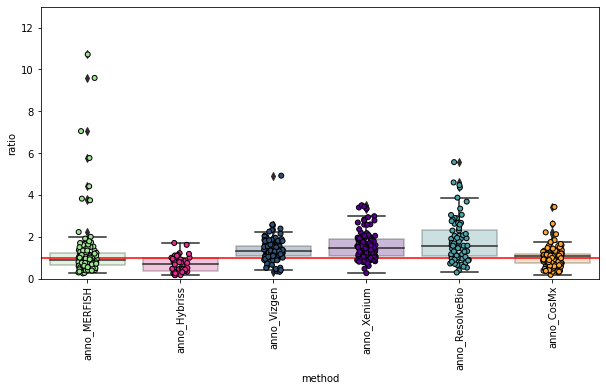

In [87]:
df_list = []
for key in means.keys():
    genes_SS = genes_s[key]
    mm = combine_med(means[key], tag = key)
    df_list.append(mm)
    mm['gene'] = genes_SS
df_con = pd.concat(df_list)
df_con['color'] = df_con.method.map(color_dicitonary)
df_con.to_csv('ratio_efficiency_in_cortex.csv')
df_con_filt = df_con[df_con.method.isin(['anno_Vizgen','anno_Xenium','anno_ResolveBio','anno_CosMx','anno_Hybriss','anno_MERFISH'])]
with plt.rc_context({'figure.figsize': (10, 5)}):
    sns.boxplot(x="method", y="ratio",
             # colormap="Set3",# order=clarity_ranking,
               data=df_con_filt[df_con_filt.method != 'anno_scRNAseq'], palette=list(df_con_filt['color'].unique()), boxprops=dict(alpha=.3))
    sns.stripplot(x="method", y="ratio",edgecolor='black',
            linewidth=1,
             # colormap="Set3",# order=clarity_ranking,
               data=df_con_filt[df_con_filt.method != 'anno_scRNAseq'], palette=list(df_con_filt['color'].unique()))
    plt.ylim([0,13])
    plt.axhline(y = 1, color = 'r', linestyle = '-')
    plt.xticks(rotation = 90) # Rotates X-Axis Ticks by 45-degrees
    plt.show()

### Now we plot it for all methods (CORTEX)

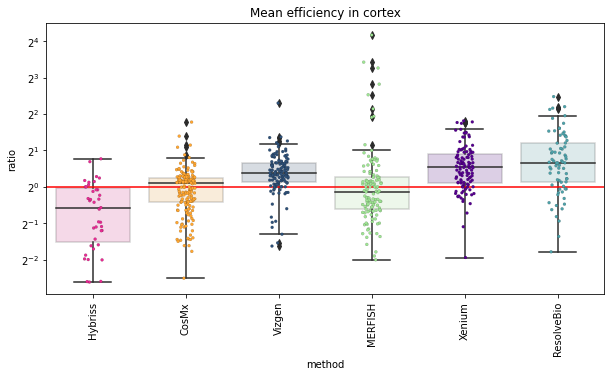

In [88]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
df_con['method'] = df_con['method'].str.replace('anno_', '')
df_con['method'] = df_con['method'].str.replace('r1_multisection_', '')
mean_by_category = df_con.groupby('method')['ratio'].mean().sort_values(ascending = True)
with plt.rc_context({'figure.figsize': (10, 5)}):
    fig,ax=plt.subplots()
    sns.boxplot(x="method", y="ratio",
             # colormap="Set3",# order=clarity_ranking,
               data=df_con[df_con.method != 'scRNAseq'], palette=[color_dicitonary['anno_'+indi] for indi in mean_by_category.index], boxprops=dict(alpha=.2), order = mean_by_category.index)
    sns.stripplot(x="method", y="ratio",edgecolor='black',
            linewidth=0.1,s = 3,
             # colormap="Set3",# order=clarity_ranking,
               data=df_con[df_con.method != 'scRNAseq'], palette=[color_dicitonary['anno_'+indi] for indi in mean_by_category.index],order = mean_by_category.index)
   # plt.ylim([0,13])
    plt.axhline(y = 1, color = 'r', linestyle = '-')
    ax.set_yscale('log', base=2)
    plt.xticks(rotation = 90) # Rotates X-Axis Ticks by 45-degrees
   # plt.yscale('log', basey=2)
    plt.title('Mean efficiency in cortex')
#    plt.show()
    plt.savefig('../../figures/2.comparison_between_datasets/ratios_vs_sc/ratios_version_cortex_resegmented_segmentation.pdf')
    df_con.to_csv('../../figures/2.comparison_between_datasets/ratios_vs_sc/ratios_version_cortex_resegmented_segmentation.csv')

# REGION 2: HIPPOCAMPUS

In [89]:
adata_dict_all['anno_Vizgen'].obs['spatial annotation']=[i.replace('HYP','HPF') for i in adata_dict_all['anno_Vizgen'].obs['spatial annotation']]

In [90]:
hip_clusters=['D: CA','CA1-slm', 'CA1-so', 'CA1-sp', 'CA1-sr', 'CA2-slm', 'CA2-so', 'CA2-sp' ,'CA2-sr',
 'CA3-slm', 'CA3-slu', 'CA3-so', 'CA3-sp' ,'CA3-sr','DG-mo' ,'DG-po',
 'DG-sg','so','slm','sg','HIP','D: HPF','D: HPF [1]',
'slu','po','sg','slm','slu','mo','so','sp3','sp1/2','D: HPF','HPF','sp','sg','sr','sg' ,'slm', 'so', 'sp1', 'sp2/3', 'sr']

anno_CosMx


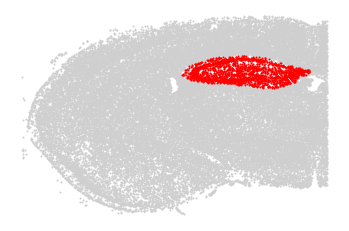

anno_Hybriss


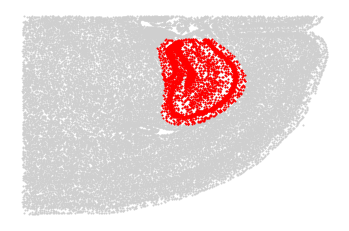

anno_MERFISH


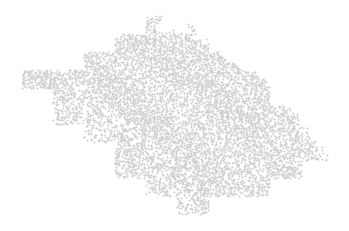

anno_ResolveBio


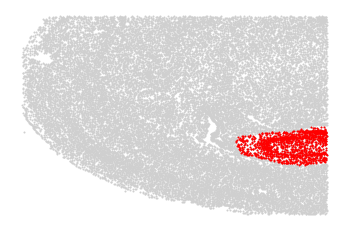

anno_Vizgen


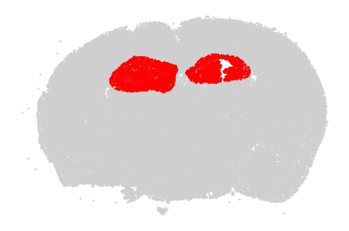

anno_Xenium


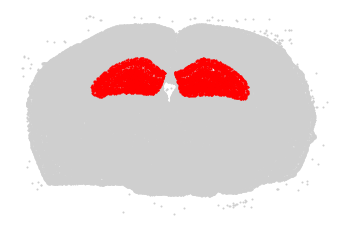

anno_scRNAseq


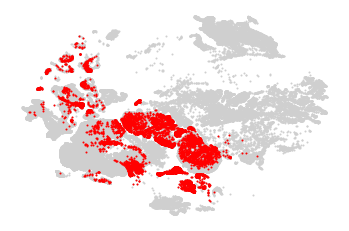

In [91]:
for aa in  adata_dict_all.keys():
    try:
        print(aa)
        adata_dict[aa]=adata_dict_all[aa][adata_dict_all[aa].obs['spatial annotation'].astype(str).isin(hip_clusters)]
        plt.figure()
        plt.scatter(adata_dict_all[aa].obs['x'],adata_dict_all[aa].obs['y'],c='#cfcfcf',s=1)
        plt.scatter(adata_dict[aa].obs['x'],adata_dict[aa].obs['y'],c='red',s=1)
#        plt.title(str(aa)+' '+str('HPF'))
        plt.axis('off')
        plt.savefig('../../figures/2.comparison_between_datasets/ratios_vs_sc/ROI_HPF_'+str(aa)+'.png')
        plt.show()
    except:
        print('not possible')

In [92]:
means,genes_s=median_calculator(adata_dict,df_filt)

0it [00:00, ?it/s]

oprk1
(22248, 1)


/home/sergio/anaconda3/envs/xb/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3438: RuntimeWarning: Mean of empty slice.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/home/sergio/anaconda3/envs/xb/lib/python3.7/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
1it [00:01,  1.22s/it]

satb2
(22248, 1)


2it [00:02,  1.16s/it]

nrp2
(22248, 1)


3it [00:03,  1.11s/it]

fn1
(22248, 1)


4it [00:04,  1.09s/it]

igfbp5
(22248, 1)


5it [00:05,  1.07s/it]

epha4
(22248, 1)


6it [00:06,  1.06s/it]

dner
(22248, 1)


7it [00:07,  1.06s/it]

ramp1
(22248, 1)


8it [00:08,  1.05s/it]

cntnap5b
(22248, 1)


9it [00:09,  1.05s/it]

cdh20
(22248, 1)


10it [00:10,  1.05s/it]

rnf152
(22248, 1)


11it [00:11,  1.05s/it]

tmem163
(22248, 1)


12it [00:12,  1.05s/it]

avpr1b


13it [00:13,  1.19it/s]

adora1
(22248, 1)


14it [00:14,  1.11it/s]

gpr37l1
(22248, 1)


15it [00:15,  1.05it/s]

ptgs2
(22248, 1)


16it [00:16,  1.02it/s]

rgs5
(22248, 1)


17it [00:17,  1.00it/s]

opn3
(22248, 1)


18it [00:18,  1.01s/it]

prox1
(22248, 1)


19it [00:19,  1.02s/it]

mrc1
(22248, 1)


20it [00:20,  1.03s/it]

gpr158
(22248, 1)


21it [00:21,  1.05s/it]

gad2
(22248, 1)


22it [00:22,  1.08s/it]

lhx6
(22248, 1)


23it [00:23,  1.07s/it]

nr4a2
(22248, 1)


24it [00:24,  1.06s/it]

tbr1
(22248, 1)


25it [00:25,  1.06s/it]

cobll1
(22248, 1)


26it [00:26,  1.05s/it]

gad1
(22248, 1)


27it [00:27,  1.05s/it]

pde11a
(22248, 1)


28it [00:29,  1.05s/it]

pde1a
(22248, 1)


29it [00:30,  1.05s/it]

aplnr


30it [00:30,  1.19it/s]

spi1
(22248, 1)


31it [00:31,  1.11it/s]

cd44
(22248, 1)


32it [00:32,  1.06it/s]

bdnf
(22248, 1)


33it [00:33,  1.02it/s]

lgr4
(22248, 1)


34it [00:34,  1.02s/it]

chrm5


35it [00:35,  1.22it/s]

meis2
(22248, 1)


36it [00:36,  1.13it/s]

mertk
(22248, 1)


37it [00:37,  1.04it/s]

pdyn
(22248, 1)


38it [00:38,  1.01it/s]

adra1d
(22248, 1)


39it [00:39,  1.01s/it]

prokr2
(22248, 1)


40it [00:40,  1.02s/it]

lamp5
(22248, 1)


41it [00:41,  1.03s/it]

snap25
(22248, 1)


42it [00:42,  1.03s/it]

sstr4


43it [00:42,  1.20it/s]

syndig1
(22248, 1)


44it [00:43,  1.12it/s]

slc32a1
(22248, 1)


45it [00:44,  1.06it/s]

sulf2
(22248, 1)


46it [00:45,  1.03it/s]

tshz2
(22248, 1)


47it [00:46,  1.01it/s]

cbln4
(22248, 1)


48it [00:48,  1.01s/it]

mc3r


49it [00:48,  1.20it/s]

ntsr1
(22248, 1)


50it [00:49,  1.11it/s]

crh
(22248, 1)


51it [00:50,  1.03it/s]

agtr1b
(22248, 1)


52it [00:51,  1.01it/s]

trpc4
(22248, 1)


53it [00:52,  1.01s/it]

p2ry14
(22248, 1)


54it [00:53,  1.02s/it]

p2ry12
(22248, 1)


55it [00:54,  1.03s/it]

plch1
(22248, 1)


56it [00:55,  1.03s/it]

rxfp1
(22248, 1)


57it [00:56,  1.03s/it]

npy2r
(22248, 1)


58it [00:57,  1.04s/it]

ntrk1


59it [00:58,  1.20it/s]

ctss
(22248, 1)


60it [00:59,  1.12it/s]

syt6
(22248, 1)


61it [01:00,  1.06it/s]

ndst4
(22248, 1)


62it [01:01,  1.03it/s]

camk2d
(22248, 1)


63it [01:02,  1.01s/it]

npnt
(22248, 1)


64it [01:03,  1.03s/it]

emcn
(22248, 1)


65it [01:04,  1.05s/it]

col24a1
(22248, 1)


66it [01:05,  1.05s/it]

lpar3
(22248, 1)


67it [01:06,  1.05s/it]

adgrl2
(22248, 1)


68it [01:07,  1.05s/it]

adgrl4
(22248, 1)


69it [01:08,  1.05s/it]

slc44a5
(22248, 1)


70it [01:09,  1.05s/it]

ptger3
(22248, 1)


71it [01:10,  1.04s/it]

penk
(22248, 1)


72it [01:12,  1.05s/it]

tox
(22248, 1)


73it [01:13,  1.04s/it]

calb1
(22248, 1)


74it [01:14,  1.04s/it]

epha7
(22248, 1)


75it [01:15,  1.05s/it]

cnr1
(22248, 1)


76it [01:16,  1.05s/it]

gabbr2
(22248, 1)


77it [01:17,  1.07s/it]

lpar1
(22248, 1)


78it [01:18,  1.06s/it]

ror1
(22248, 1)


79it [01:19,  1.08s/it]

rab3b
(22248, 1)


80it [01:20,  1.07s/it]

pou3f1
(22248, 1)


81it [01:21,  1.06s/it]

rspo1
(22248, 1)


82it [01:22,  1.06s/it]

oprd1
(22248, 1)


83it [01:23,  1.05s/it]

c1qb
(22248, 1)


84it [01:24,  1.05s/it]

c1qa
(22248, 1)


85it [01:25,  1.04s/it]

htr6
(22248, 1)


86it [01:26,  1.04s/it]

grm3
(22248, 1)


87it [01:27,  1.04s/it]

sema3e
(22248, 1)


88it [01:28,  1.04s/it]

reln
(22248, 1)


89it [01:29,  1.04s/it]

otof
(22248, 1)


90it [01:31,  1.07s/it]

slit2
(22248, 1)


91it [01:32,  1.06s/it]

cckar


92it [01:32,  1.18it/s]

pdgfra
(22248, 1)


93it [01:33,  1.07it/s]

kit
(22248, 1)


94it [01:34,  1.04it/s]

kdr
(22248, 1)


95it [01:35,  1.01it/s]

adgrl3
(22248, 1)


96it [01:36,  1.01s/it]

parm1
(22248, 1)


97it [01:37,  1.02s/it]

prdm8
(22248, 1)


98it [01:38,  1.02s/it]

spp1
(22248, 1)


99it [01:39,  1.03s/it]

selplg
(22248, 1)


100it [01:40,  1.04s/it]

nos1
(22248, 1)


101it [01:41,  1.04s/it]

cux2
(22248, 1)


102it [01:42,  1.04s/it]

gjc3
(22248, 1)


103it [01:44,  1.04s/it]

flt1
(22248, 1)


104it [01:45,  1.07s/it]

rxfp2
(22248, 1)


105it [01:46,  1.06s/it]

calcr
(22248, 1)


106it [01:47,  1.08s/it]

thsd7a
(22248, 1)


107it [01:48,  1.07s/it]

foxp2
(22248, 1)


108it [01:49,  1.06s/it]

gpr37
(22248, 1)


109it [01:50,  1.06s/it]

grm8
(22248, 1)


110it [01:51,  1.05s/it]

chrm2
(22248, 1)


111it [01:52,  1.05s/it]

npy
(22248, 1)


112it [01:53,  1.05s/it]

crhr2
(22248, 1)


113it [01:54,  1.05s/it]

tacr1
(22248, 1)


114it [01:55,  1.05s/it]

aldh1l1
(22248, 1)


115it [01:56,  1.05s/it]

grm7
(22248, 1)


116it [01:57,  1.05s/it]

slc6a1
(22248, 1)


117it [01:58,  1.06s/it]

ret
(22248, 1)


118it [01:59,  1.06s/it]

grin2b
(22248, 1)


119it [02:01,  1.08s/it]

kcnj8
(22248, 1)


120it [02:02,  1.07s/it]

itpr2
(22248, 1)


121it [02:03,  1.06s/it]

pthlh
(22248, 1)


122it [02:04,  1.06s/it]

c5ar1
(22248, 1)


123it [02:05,  1.05s/it]

axl
(22248, 1)


124it [02:06,  1.05s/it]

slc17a7
(22248, 1)


125it [02:07,  1.06s/it]

mrgprx2


126it [02:07,  1.18it/s]

slc17a6
(22248, 1)


127it [02:08,  1.09it/s]

igf1r
(22248, 1)


128it [02:09,  1.03it/s]

nr2f2
(22248, 1)


129it [02:10,  1.00s/it]

ntrk3
(22248, 1)


130it [02:12,  1.03s/it]

mfge8
(22248, 1)


131it [02:13,  1.07s/it]

grm5
(22248, 1)


132it [02:14,  1.08s/it]

cckbr
(22248, 1)


133it [02:15,  1.10s/it]

dkk3
(22248, 1)


134it [02:16,  1.09s/it]

sox6
(22248, 1)


135it [02:17,  1.08s/it]

fgfr2
(22248, 1)


136it [02:18,  1.08s/it]

drd4
(22248, 1)


137it [02:19,  1.08s/it]

igf2
(22248, 1)


138it [02:20,  1.08s/it]

th
(22248, 1)


139it [02:21,  1.08s/it]

insr
(22248, 1)


140it [02:22,  1.09s/it]

npy1r
(22248, 1)


141it [02:24,  1.08s/it]

lpl
(22248, 1)


142it [02:25,  1.09s/it]

lpar2
(22248, 1)


143it [02:26,  1.08s/it]

ednra
(22248, 1)


144it [02:27,  1.10s/it]

inpp4b
(22248, 1)


145it [02:28,  1.09s/it]

adgrg1
(22248, 1)


146it [02:29,  1.11s/it]

calb2
(22248, 1)


147it [02:30,  1.10s/it]

cdh13
(22248, 1)


148it [02:31,  1.10s/it]

npsr1
(22248, 1)


149it [02:32,  1.09s/it]

dscaml1
(22248, 1)


150it [02:33,  1.08s/it]

htr3a
(22248, 1)


151it [02:34,  1.08s/it]

drd2
(22248, 1)


152it [02:36,  1.08s/it]

cspg4
(22248, 1)


153it [02:37,  1.08s/it]

cplx3
(22248, 1)


154it [02:38,  1.07s/it]

rora
(22248, 1)


155it [02:39,  1.08s/it]

unc13c
(22248, 1)


156it [02:40,  1.08s/it]

cspg5
(22248, 1)


157it [02:41,  1.10s/it]

cx3cr1
(22248, 1)


158it [02:42,  1.09s/it]

vipr1
(22248, 1)


159it [02:43,  1.11s/it]

vip
(22248, 1)


160it [02:44,  1.11s/it]

oprm1
(22248, 1)


161it [02:45,  1.10s/it]

grm1
(22248, 1)


162it [02:46,  1.09s/it]

ccn2
(22248, 1)


163it [02:48,  1.08s/it]

cd24a
(22248, 1)


164it [02:49,  1.07s/it]

pln
(22248, 1)


165it [02:50,  1.06s/it]

man1a
(22248, 1)


166it [02:51,  1.05s/it]

egr2
(22248, 1)


167it [02:52,  1.05s/it]

pcdh15
(22248, 1)


168it [02:53,  1.05s/it]

adora2a
(22248, 1)


169it [02:54,  1.05s/it]

slc17a8
(22248, 1)


170it [02:55,  1.07s/it]

dcn
(22248, 1)


171it [02:56,  1.06s/it]

lgr5
(22248, 1)


172it [02:57,  1.08s/it]

avpr1a


173it [02:57,  1.16it/s]

nxph4
(22248, 1)


174it [02:58,  1.09it/s]

tac2
(22248, 1)


175it [03:00,  1.04it/s]

egfr
(22248, 1)


176it [03:01,  1.01it/s]

adra1b
(22248, 1)


177it [03:02,  1.00s/it]

adamts2
(22248, 1)


178it [03:03,  1.02s/it]

glp2r
(22248, 1)


179it [03:04,  1.03s/it]

serpinf1
(22248, 1)


180it [03:05,  1.03s/it]

aldoc
(22248, 1)


181it [03:06,  1.03s/it]

vtn
(22248, 1)


182it [03:07,  1.04s/it]

col1a1


183it [03:07,  1.20it/s]

ppp1r1b
(22248, 1)


184it [03:08,  1.09it/s]

igfbp4
(22248, 1)


185it [03:09,  1.04it/s]

gfap
(22248, 1)


186it [03:11,  1.01s/it]

crhr1
(22248, 1)


187it [03:12,  1.02s/it]

pecam1
(22248, 1)


188it [03:13,  1.03s/it]

sox9
(22248, 1)


189it [03:14,  1.04s/it]

sstr2
(22248, 1)


190it [03:15,  1.04s/it]

cd300c2
(22248, 1)


191it [03:16,  1.04s/it]

galr2


192it [03:16,  1.20it/s]

foxj1
(22248, 1)


193it [03:17,  1.11it/s]

rbfox3
(22248, 1)


194it [03:18,  1.06it/s]

gcgr
(22248, 1)


195it [03:19,  1.03it/s]

ntsr2
(22248, 1)


196it [03:20,  1.00it/s]

id2
(22248, 1)


197it [03:21,  1.01s/it]

egln3
(22248, 1)


198it [03:22,  1.04s/it]

sstr1
(22248, 1)


199it [03:24,  1.05s/it]

rgs6
(22248, 1)


200it [03:25,  1.07s/it]

fos
(22248, 1)


201it [03:26,  1.06s/it]

bcl11b
(22248, 1)


202it [03:27,  1.06s/it]

dlk1
(22248, 1)


203it [03:28,  1.05s/it]

vipr2
(22248, 1)


204it [03:29,  1.05s/it]

itgb8
(22248, 1)


205it [03:30,  1.05s/it]

chrm3
(22248, 1)


206it [03:31,  1.05s/it]

agtr1a
(22248, 1)


207it [03:32,  1.04s/it]

nrn1
(22248, 1)


208it [03:33,  1.04s/it]

drd1
(22248, 1)


209it [03:34,  1.05s/it]

cxcl14
(22248, 1)


210it [03:35,  1.05s/it]

ntrk2
(22248, 1)


211it [03:36,  1.07s/it]

slc6a3
(22248, 1)


212it [03:37,  1.07s/it]

rasgrf2
(22248, 1)


213it [03:38,  1.08s/it]

hexb
(22248, 1)


214it [03:39,  1.07s/it]

cartpt
(22248, 1)


215it [03:40,  1.06s/it]

htr1a
(22248, 1)


216it [03:42,  1.06s/it]

fezf2
(22248, 1)


217it [03:43,  1.05s/it]

synpr
(22248, 1)


218it [03:44,  1.05s/it]

chat
(22248, 1)


219it [03:45,  1.05s/it]

sncg
(22248, 1)


220it [03:46,  1.05s/it]

fzd3
(22248, 1)


221it [03:47,  1.05s/it]

lpar6
(22248, 1)


222it [03:48,  1.05s/it]

htr2a
(22248, 1)


223it [03:49,  1.05s/it]

ednrb
(22248, 1)


224it [03:50,  1.07s/it]

plcxd3
(22248, 1)


225it [03:52,  1.25s/it]

cdh9
(22248, 1)


226it [03:53,  1.19s/it]

sema5a
(22248, 1)


227it [03:54,  1.15s/it]

trhr
(22248, 1)


228it [03:55,  1.12s/it]

deptor
(22248, 1)


229it [03:56,  1.10s/it]

pvalb
(22248, 1)


230it [03:57,  1.09s/it]

sox10
(22248, 1)


231it [03:58,  1.08s/it]

wnt7b
(22248, 1)


232it [03:59,  1.07s/it]

igfbp6
(22248, 1)


233it [04:00,  1.07s/it]

cldn5
(22248, 1)


234it [04:01,  1.06s/it]

sst
(22248, 1)


235it [04:02,  1.09s/it]

epha6
(22248, 1)


236it [04:03,  1.08s/it]

htr1f
(22248, 1)


237it [04:04,  1.09s/it]

chodl
(22248, 1)


238it [04:06,  1.08s/it]

grik1
(22248, 1)


239it [04:07,  1.07s/it]

olig2
(22248, 1)


240it [04:08,  1.06s/it]

olig1
(22248, 1)


241it [04:09,  1.06s/it]

pcp4
(22248, 1)


242it [04:10,  1.06s/it]

glp1r
(22248, 1)


243it [04:11,  1.05s/it]

mog
(22248, 1)


244it [04:12,  1.05s/it]

trem2
(22248, 1)


245it [04:13,  1.05s/it]

daam2
(22248, 1)


246it [04:14,  1.05s/it]

alk
(22248, 1)


247it [04:15,  1.05s/it]

calm2
(22248, 1)


248it [04:16,  1.05s/it]

aqp4
(22248, 1)


249it [04:17,  1.07s/it]

ttr


250it [04:18,  1.16it/s]

gpr17
(22248, 1)


251it [04:19,  1.08it/s]

cd14
(22248, 1)


252it [04:20,  1.02it/s]

prr16
(22248, 1)


253it [04:21,  1.00s/it]

pdgfrb
(22248, 1)


254it [04:22,  1.02s/it]

csf1r
(22248, 1)


255it [04:23,  1.03s/it]

adrb2
(22248, 1)


256it [04:24,  1.03s/it]

mc4r
(22248, 1)


257it [04:25,  1.04s/it]

mc5r
(22248, 1)


258it [04:26,  1.04s/it]

mc2r


259it [04:26,  1.19it/s]

galr1
(22248, 1)


260it [04:27,  1.11it/s]

mbp
(22248, 1)


261it [04:28,  1.06it/s]

cbln2
(22248, 1)


262it [04:30,  1.02it/s]

chrm1
(22248, 1)


263it [04:31,  1.01s/it]

tle4
(22248, 1)


264it [04:32,  1.04s/it]

pcsk5
(22248, 1)


265it [04:33,  1.04s/it]

rorb
(22248, 1)


266it [04:34,  1.07s/it]

pip5k1b
(22248, 1)


267it [04:35,  1.06s/it]

acta2
(22248, 1)


268it [04:36,  1.06s/it]

rbp4
(22248, 1)


269it [04:37,  1.06s/it]

blnk
(22248, 1)


270it [04:38,  1.06s/it]

opalin
(22248, 1)


271it [04:39,  1.05s/it]

agtr2
(22248, 1)


272it [04:40,  1.05s/it]

avpr2


273it [04:41,  1.18it/s]

plp1
(22248, 1)


274it [04:42,  1.10it/s]

il1rapl2
(22248, 1)


275it [04:43,  1.05it/s]

htr2c
(22248, 1)


276it [04:44,  1.03s/it]


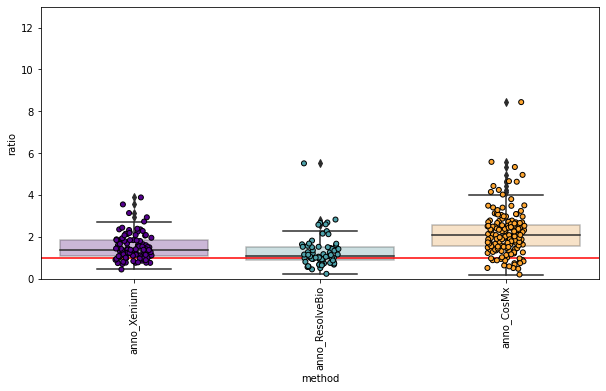

In [93]:
df_list = []
for key in means.keys():
    genes_SS = genes_s[key]
    mm = combine_med(means[key], tag = key)
    df_list.append(mm)
    mm['gene'] = genes_SS
df_con = pd.concat(df_list)
df_con['color'] = df_con.method.map(color_dicitonary)
df_con.to_csv('ratio_efficiency_in_cortex.csv')
df_con_filt = df_con[df_con.method.isin(['anno_vizgen','anno_Xenium','anno_ResolveBio','anno_CosMx'])]
with plt.rc_context({'figure.figsize': (10, 5)}):
    sns.boxplot(x="method", y="ratio",
             # colormap="Set3",# order=clarity_ranking,
               data=df_con_filt[df_con_filt.method != 'anno_scRNAseq'], palette=list(df_con_filt['color'].unique()), boxprops=dict(alpha=.3))
    sns.stripplot(x="method", y="ratio",edgecolor='black',
            linewidth=1,
             # colormap="Set3",# order=clarity_ranking,
               data=df_con_filt[df_con_filt.method != 'anno_scRNAseq'], palette=list(df_con_filt['color'].unique()))
    plt.ylim([0,13])
    plt.axhline(y = 1, color = 'r', linestyle = '-')
    plt.xticks(rotation = 90) # Rotates X-Axis Ticks by 45-degrees
    plt.show()

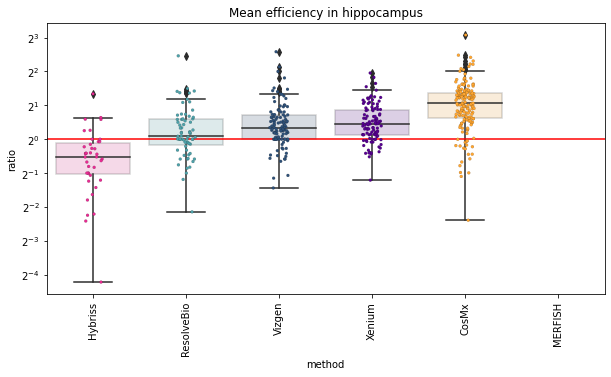

In [94]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
df_con['method'] = df_con['method'].str.replace('anno_', '')
df_con['method'] = df_con['method'].str.replace('r1_multisection_', '')
mean_by_category = df_con.groupby('method')['ratio'].mean().sort_values(ascending = True)
with plt.rc_context({'figure.figsize': (10, 5)}):
    fig,ax=plt.subplots()
    sns.boxplot(x="method", y="ratio",
             # colormap="Set3",# order=clarity_ranking,
               data=df_con[df_con.method != 'scRNAseq'], palette=[color_dicitonary['anno_'+indi] for indi in mean_by_category.index], boxprops=dict(alpha=.2), order = mean_by_category.index)
    sns.stripplot(x="method", y="ratio",edgecolor='black',
            linewidth=0.1,s = 3,
             # colormap="Set3",# order=clarity_ranking,
               data=df_con[df_con.method != 'scRNAseq'], palette=[color_dicitonary['anno_'+indi] for indi in mean_by_category.index],order = mean_by_category.index)
   # plt.ylim([0,13])
    plt.axhline(y = 1, color = 'r', linestyle = '-')
    ax.set_yscale('log', base=2)
    plt.xticks(rotation = 90) # Rotates X-Axis Ticks by 45-degrees
   # plt.yscale('log', basey=2)
    plt.title('Mean efficiency in hippocampus')
#    plt.show()
    plt.savefig('../../figures/2.comparison_between_datasets/ratios_vs_sc/ratios_version_hippocampus_resegmented_segmentation.pdf')

In [95]:
df_con.to_csv('../../figures/2.comparison_between_datasets/ratios_vs_sc/ratios_version_hippocampus_resegmented_segmentation.csv')

# Region 3: thalamus

In [96]:
thal_clusters=['APN','CM','m/c','IMD','PVT','MH','sm','LH','VAL','PCN','I','CL','LD','PO','VPM','VPL','RT','LGv','LP','PF','PO','RT','ZI','LD','MD','VPL','VAL','VPM','VPL','LGd','LH','LP','MH','RT','SPF','TH','THA','D: TH','D: THA','em','ml']

anno_CosMx


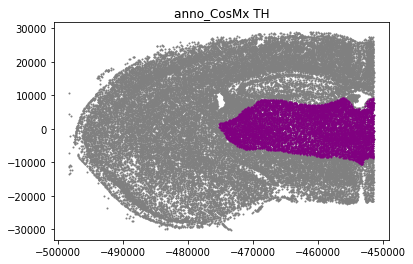

anno_Hybriss


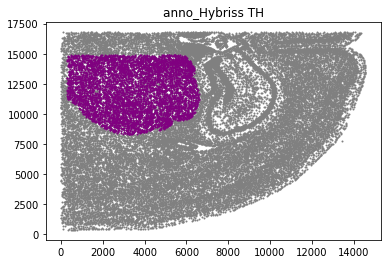

anno_MERFISH


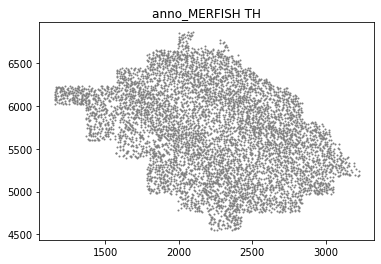

anno_ResolveBio


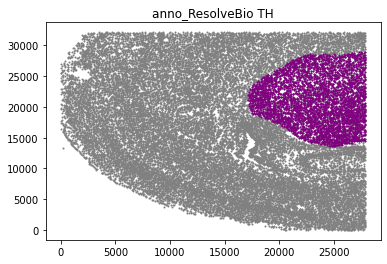

anno_Vizgen


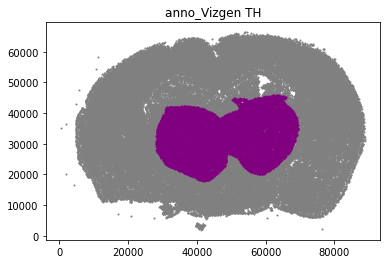

anno_Xenium


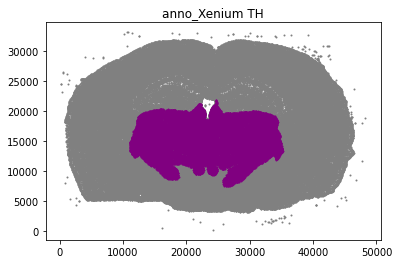

anno_scRNAseq


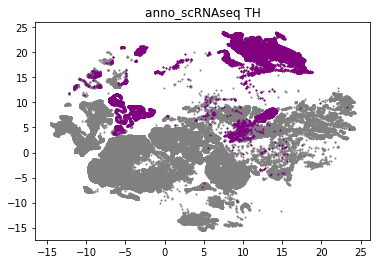

In [97]:
for aa in  adata_dict_all.keys():
    try:
        print(aa)
        adata_dict[aa]=adata_dict_all[aa][adata_dict_all[aa].obs['spatial annotation'].astype(str).isin(thal_clusters)]
        plt.figure()
        plt.scatter(adata_dict_all[aa].obs['x'],adata_dict_all[aa].obs['y'],c='grey',s=1)
        plt.scatter(adata_dict[aa].obs['x'],adata_dict[aa].obs['y'],c='purple',s=1)
        plt.title(str(aa)+' '+str('TH'))
        plt.show()
    except:
        print('not possible')

In [98]:
means,genes_s=median_calculator(adata_dict,df_filt)

0it [00:00, ?it/s]

oprk1
(20229, 1)


/home/sergio/anaconda3/envs/xb/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3438: RuntimeWarning: Mean of empty slice.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/home/sergio/anaconda3/envs/xb/lib/python3.7/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
1it [00:01,  1.22s/it]

satb2
(20229, 1)


2it [00:02,  1.18s/it]

nrp2
(20229, 1)


3it [00:03,  1.13s/it]

fn1
(20229, 1)


4it [00:04,  1.11s/it]

igfbp5
(20229, 1)


5it [00:05,  1.10s/it]

epha4
(20229, 1)


6it [00:06,  1.09s/it]

dner
(20229, 1)


7it [00:07,  1.09s/it]

ramp1
(20229, 1)


8it [00:08,  1.08s/it]

cntnap5b
(20229, 1)


9it [00:09,  1.08s/it]

cdh20
(20229, 1)


10it [00:10,  1.07s/it]

rnf152
(20229, 1)


11it [00:12,  1.08s/it]

tmem163
(20229, 1)


12it [00:13,  1.07s/it]

avpr1b


13it [00:13,  1.17it/s]

adora1
(20229, 1)


14it [00:14,  1.08it/s]

gpr37l1
(20229, 1)


15it [00:15,  1.03it/s]

ptgs2
(20229, 1)


16it [00:16,  1.02s/it]

rgs5
(20229, 1)


17it [00:17,  1.04s/it]

opn3
(20229, 1)


18it [00:18,  1.06s/it]

prox1
(20229, 1)


19it [00:20,  1.08s/it]

mrc1
(20229, 1)


20it [00:21,  1.08s/it]

gpr158
(20229, 1)


21it [00:22,  1.07s/it]

gad2
(20229, 1)


22it [00:23,  1.08s/it]

lhx6
(20229, 1)


23it [00:24,  1.08s/it]

nr4a2
(20229, 1)


24it [00:25,  1.08s/it]

tbr1
(20229, 1)


25it [00:26,  1.07s/it]

cobll1
(20229, 1)


26it [00:27,  1.07s/it]

gad1
(20229, 1)


27it [00:28,  1.08s/it]

pde11a
(20229, 1)


28it [00:29,  1.08s/it]

pde1a
(20229, 1)


29it [00:30,  1.07s/it]

aplnr


30it [00:31,  1.16it/s]

spi1
(20229, 1)


31it [00:32,  1.08it/s]

cd44
(20229, 1)


32it [00:33,  1.01it/s]

bdnf
(20229, 1)


33it [00:34,  1.02s/it]

lgr4
(20229, 1)


34it [00:35,  1.04s/it]

chrm5


35it [00:35,  1.17it/s]

meis2
(20229, 1)


36it [00:37,  1.09it/s]

mertk
(20229, 1)


37it [00:38,  1.04it/s]

pdyn
(20229, 1)


38it [00:39,  1.00it/s]

adra1d


39it [00:39,  1.24it/s]

prokr2
(20229, 1)


40it [00:40,  1.13it/s]

lamp5
(20229, 1)


41it [00:41,  1.06it/s]

snap25
(20229, 1)


42it [00:42,  1.02it/s]

sstr4


43it [00:43,  1.25it/s]

syndig1
(20229, 1)


44it [00:44,  1.14it/s]

slc32a1
(20229, 1)


45it [00:45,  1.07it/s]

sulf2
(20229, 1)


46it [00:46,  1.03it/s]

tshz2
(20229, 1)


47it [00:47,  1.00s/it]

cbln4
(20229, 1)


48it [00:48,  1.03s/it]

mc3r
(20229, 1)


49it [00:49,  1.07s/it]

ntsr1
(20229, 1)


50it [00:50,  1.07s/it]

crh
(20229, 1)


51it [00:51,  1.08s/it]

agtr1b
(20229, 1)


52it [00:52,  1.10s/it]

trpc4
(20229, 1)


53it [00:54,  1.09s/it]

p2ry14
(20229, 1)


54it [00:55,  1.09s/it]

p2ry12
(20229, 1)


55it [00:56,  1.08s/it]

plch1
(20229, 1)


56it [00:57,  1.08s/it]

rxfp1
(20229, 1)


57it [00:58,  1.08s/it]

npy2r
(20229, 1)


58it [00:59,  1.08s/it]

ntrk1
(20229, 1)


59it [01:00,  1.08s/it]

ctss
(20229, 1)


60it [01:01,  1.07s/it]

syt6
(20229, 1)


61it [01:02,  1.08s/it]

ndst4
(20229, 1)


62it [01:03,  1.08s/it]

camk2d
(20229, 1)


63it [01:04,  1.08s/it]

npnt
(20229, 1)


64it [01:05,  1.10s/it]

emcn
(20229, 1)


65it [01:07,  1.09s/it]

col24a1
(20229, 1)


66it [01:08,  1.09s/it]

lpar3
(20229, 1)


67it [01:09,  1.10s/it]

adgrl2
(20229, 1)


68it [01:10,  1.09s/it]

adgrl4
(20229, 1)


69it [01:11,  1.09s/it]

slc44a5
(20229, 1)


70it [01:12,  1.08s/it]

ptger3
(20229, 1)


71it [01:13,  1.08s/it]

penk
(20229, 1)


72it [01:14,  1.08s/it]

tox
(20229, 1)


73it [01:15,  1.08s/it]

calb1
(20229, 1)


74it [01:16,  1.08s/it]

epha7
(20229, 1)


75it [01:17,  1.08s/it]

cnr1
(20229, 1)


76it [01:18,  1.08s/it]

gabbr2
(20229, 1)


77it [01:20,  1.08s/it]

lpar1
(20229, 1)


78it [01:21,  1.08s/it]

ror1
(20229, 1)


79it [01:22,  1.11s/it]

rab3b
(20229, 1)


80it [01:23,  1.10s/it]

pou3f1
(20229, 1)


81it [01:24,  1.09s/it]

rspo1
(20229, 1)


82it [01:25,  1.11s/it]

oprd1
(20229, 1)


83it [01:26,  1.10s/it]

c1qb
(20229, 1)


84it [01:27,  1.09s/it]

c1qa
(20229, 1)


85it [01:28,  1.08s/it]

htr6


86it [01:29,  1.15it/s]

grm3
(20229, 1)


87it [01:30,  1.07it/s]

sema3e
(20229, 1)


88it [01:31,  1.03it/s]

reln
(20229, 1)


89it [01:32,  1.00s/it]

otof
(20229, 1)


90it [01:33,  1.02s/it]

slit2
(20229, 1)


91it [01:34,  1.04s/it]

cckar
(20229, 1)


92it [01:35,  1.05s/it]

pdgfra
(20229, 1)


93it [01:36,  1.07s/it]

kit
(20229, 1)


94it [01:37,  1.07s/it]

kdr
(20229, 1)


95it [01:38,  1.10s/it]

adgrl3
(20229, 1)


96it [01:40,  1.09s/it]

parm1
(20229, 1)


97it [01:41,  1.10s/it]

prdm8
(20229, 1)


98it [01:42,  1.10s/it]

spp1
(20229, 1)


99it [01:43,  1.10s/it]

selplg
(20229, 1)


100it [01:44,  1.09s/it]

nos1
(20229, 1)


101it [01:45,  1.08s/it]

cux2
(20229, 1)


102it [01:46,  1.08s/it]

gjc3
(20229, 1)


103it [01:47,  1.08s/it]

flt1
(20229, 1)


104it [01:48,  1.08s/it]

rxfp2
(20229, 1)


105it [01:49,  1.07s/it]

calcr
(20229, 1)


106it [01:50,  1.07s/it]

thsd7a
(20229, 1)


107it [01:51,  1.08s/it]

foxp2
(20229, 1)


108it [01:53,  1.08s/it]

gpr37
(20229, 1)


109it [01:54,  1.08s/it]

grm8
(20229, 1)


110it [01:55,  1.10s/it]

chrm2
(20229, 1)


111it [01:56,  1.10s/it]

npy
(20229, 1)


112it [01:57,  1.11s/it]

crhr2
(20229, 1)


113it [01:58,  1.10s/it]

tacr1
(20229, 1)


114it [01:59,  1.10s/it]

aldh1l1
(20229, 1)


115it [02:00,  1.09s/it]

grm7
(20229, 1)


116it [02:01,  1.09s/it]

slc6a1
(20229, 1)


117it [02:02,  1.08s/it]

ret
(20229, 1)


118it [02:03,  1.08s/it]

grin2b
(20229, 1)


119it [02:04,  1.08s/it]

kcnj8
(20229, 1)


120it [02:06,  1.07s/it]

itpr2
(20229, 1)


121it [02:07,  1.07s/it]

pthlh
(20229, 1)


122it [02:08,  1.08s/it]

c5ar1
(20229, 1)


123it [02:09,  1.08s/it]

axl
(20229, 1)


124it [02:10,  1.08s/it]

slc17a7
(20229, 1)


125it [02:11,  1.11s/it]

mrgprx2


126it [02:11,  1.13it/s]

slc17a6
(20229, 1)


127it [02:13,  1.06it/s]

igf1r
(20229, 1)


128it [02:14,  1.01s/it]

nr2f2
(20229, 1)


129it [02:15,  1.02s/it]

ntrk3
(20229, 1)


130it [02:16,  1.04s/it]

mfge8
(20229, 1)


131it [02:17,  1.05s/it]

grm5
(20229, 1)


132it [02:18,  1.05s/it]

cckbr
(20229, 1)


133it [02:19,  1.06s/it]

dkk3
(20229, 1)


134it [02:20,  1.06s/it]

sox6
(20229, 1)


135it [02:21,  1.06s/it]

fgfr2
(20229, 1)


136it [02:22,  1.07s/it]

drd4
(20229, 1)


137it [02:23,  1.07s/it]

igf2
(20229, 1)


138it [02:24,  1.08s/it]

th
(20229, 1)


139it [02:25,  1.08s/it]

insr
(20229, 1)


140it [02:27,  1.10s/it]

npy1r
(20229, 1)


141it [02:28,  1.10s/it]

lpl
(20229, 1)


142it [02:29,  1.09s/it]

lpar2
(20229, 1)


143it [02:30,  1.10s/it]

ednra
(20229, 1)


144it [02:31,  1.09s/it]

inpp4b
(20229, 1)


145it [02:32,  1.09s/it]

adgrg1
(20229, 1)


146it [02:33,  1.08s/it]

calb2
(20229, 1)


147it [02:34,  1.09s/it]

cdh13
(20229, 1)


148it [02:35,  1.08s/it]

npsr1
(20229, 1)


149it [02:36,  1.08s/it]

dscaml1
(20229, 1)


150it [02:37,  1.07s/it]

htr3a
(20229, 1)


151it [02:39,  1.07s/it]

drd2
(20229, 1)


152it [02:40,  1.07s/it]

cspg4
(20229, 1)


153it [02:41,  1.07s/it]

cplx3
(20229, 1)


154it [02:42,  1.07s/it]

rora
(20229, 1)


155it [02:43,  1.09s/it]

unc13c
(20229, 1)


156it [02:44,  1.09s/it]

cspg5
(20229, 1)


157it [02:45,  1.09s/it]

cx3cr1
(20229, 1)


158it [02:46,  1.11s/it]

vipr1
(20229, 1)


159it [02:47,  1.10s/it]

vip


160it [02:48,  1.14it/s]

oprm1
(20229, 1)


161it [02:49,  1.07it/s]

grm1
(20229, 1)


162it [02:50,  1.02it/s]

ccn2
(20229, 1)


163it [02:51,  1.02s/it]

cd24a
(20229, 1)


164it [02:52,  1.03s/it]

pln
(20229, 1)


165it [02:53,  1.05s/it]

man1a
(20229, 1)


166it [02:54,  1.05s/it]

egr2


167it [02:54,  1.18it/s]

pcdh15
(20229, 1)


168it [02:56,  1.09it/s]

adora2a
(20229, 1)


169it [02:57,  1.04it/s]

slc17a8
(20229, 1)


170it [02:58,  1.00it/s]

dcn
(20229, 1)


171it [02:59,  1.03s/it]

lgr5
(20229, 1)


172it [03:00,  1.06s/it]

avpr1a
(20229, 1)


173it [03:01,  1.07s/it]

nxph4
(20229, 1)


174it [03:02,  1.14s/it]

tac2
(20229, 1)


175it [03:03,  1.12s/it]

egfr
(20229, 1)


176it [03:04,  1.11s/it]

adra1b
(20229, 1)


177it [03:06,  1.10s/it]

adamts2
(20229, 1)


178it [03:07,  1.09s/it]

glp2r
(20229, 1)


179it [03:08,  1.09s/it]

serpinf1
(20229, 1)


180it [03:09,  1.08s/it]

aldoc
(20229, 1)


181it [03:10,  1.08s/it]

vtn
(20229, 1)


182it [03:11,  1.08s/it]

col1a1
(20229, 1)


183it [03:12,  1.07s/it]

ppp1r1b
(20229, 1)


184it [03:13,  1.07s/it]

igfbp4
(20229, 1)


185it [03:14,  1.08s/it]

gfap
(20229, 1)


186it [03:15,  1.08s/it]

crhr1
(20229, 1)


187it [03:16,  1.08s/it]

pecam1
(20229, 1)


188it [03:17,  1.10s/it]

sox9
(20229, 1)


189it [03:19,  1.09s/it]

sstr2
(20229, 1)


190it [03:20,  1.09s/it]

cd300c2
(20229, 1)


191it [03:21,  1.10s/it]

galr2


192it [03:21,  1.14it/s]

foxj1
(20229, 1)


193it [03:22,  1.07it/s]

rbfox3
(20229, 1)


194it [03:23,  1.02it/s]

gcgr


195it [03:24,  1.26it/s]

ntsr2
(20229, 1)


196it [03:25,  1.13it/s]

id2
(20229, 1)


197it [03:26,  1.06it/s]

egln3
(20229, 1)


198it [03:27,  1.02it/s]

sstr1
(20229, 1)


199it [03:28,  1.01s/it]

rgs6
(20229, 1)


200it [03:29,  1.03s/it]

fos
(20229, 1)


201it [03:30,  1.04s/it]

bcl11b
(20229, 1)


202it [03:31,  1.06s/it]

dlk1
(20229, 1)


203it [03:32,  1.06s/it]

vipr2
(20229, 1)


204it [03:33,  1.07s/it]

itgb8
(20229, 1)


205it [03:34,  1.09s/it]

chrm3
(20229, 1)


206it [03:36,  1.09s/it]

agtr1a
(20229, 1)


207it [03:37,  1.10s/it]

nrn1
(20229, 1)


208it [03:38,  1.10s/it]

drd1
(20229, 1)


209it [03:39,  1.09s/it]

cxcl14
(20229, 1)


210it [03:40,  1.09s/it]

ntrk2
(20229, 1)


211it [03:41,  1.08s/it]

slc6a3
(20229, 1)


212it [03:42,  1.08s/it]

rasgrf2
(20229, 1)


213it [03:43,  1.08s/it]

hexb
(20229, 1)


214it [03:44,  1.08s/it]

cartpt
(20229, 1)


215it [03:45,  1.07s/it]

htr1a
(20229, 1)


216it [03:46,  1.07s/it]

fezf2
(20229, 1)


217it [03:47,  1.08s/it]

synpr
(20229, 1)


218it [03:49,  1.08s/it]

chat
(20229, 1)


219it [03:50,  1.09s/it]

sncg
(20229, 1)


220it [03:51,  1.10s/it]

fzd3
(20229, 1)


221it [03:52,  1.10s/it]

lpar6
(20229, 1)


222it [03:53,  1.11s/it]

htr2a
(20229, 1)


223it [03:54,  1.10s/it]

ednrb
(20229, 1)


224it [03:55,  1.09s/it]

plcxd3
(20229, 1)


225it [03:56,  1.08s/it]

cdh9
(20229, 1)


226it [03:57,  1.08s/it]

sema5a
(20229, 1)


227it [03:58,  1.08s/it]

trhr
(20229, 1)


228it [03:59,  1.08s/it]

deptor
(20229, 1)


229it [04:01,  1.08s/it]

pvalb
(20229, 1)


230it [04:02,  1.08s/it]

sox10
(20229, 1)


231it [04:03,  1.08s/it]

wnt7b
(20229, 1)


232it [04:04,  1.07s/it]

igfbp6
(20229, 1)


233it [04:05,  1.08s/it]

cldn5
(20229, 1)


234it [04:06,  1.08s/it]

sst
(20229, 1)


235it [04:07,  1.10s/it]

epha6
(20229, 1)


236it [04:08,  1.10s/it]

htr1f
(20229, 1)


237it [04:09,  1.09s/it]

chodl
(20229, 1)


238it [04:10,  1.11s/it]

grik1
(20229, 1)


239it [04:11,  1.10s/it]

olig2
(20229, 1)


240it [04:13,  1.09s/it]

olig1
(20229, 1)


241it [04:14,  1.08s/it]

pcp4
(20229, 1)


242it [04:15,  1.08s/it]

glp1r
(20229, 1)


243it [04:16,  1.08s/it]

mog
(20229, 1)


244it [04:17,  1.07s/it]

trem2
(20229, 1)


245it [04:18,  1.08s/it]

daam2
(20229, 1)


246it [04:19,  1.07s/it]

alk
(20229, 1)


247it [04:20,  1.07s/it]

calm2
(20229, 1)


248it [04:21,  1.08s/it]

aqp4
(20229, 1)


249it [04:22,  1.09s/it]

ttr
(20229, 1)


250it [04:23,  1.10s/it]

gpr17
(20229, 1)


251it [04:24,  1.10s/it]

cd14
(20229, 1)


252it [04:26,  1.11s/it]

prr16
(20229, 1)


253it [04:27,  1.10s/it]

pdgfrb
(20229, 1)


254it [04:28,  1.09s/it]

csf1r
(20229, 1)


255it [04:29,  1.09s/it]

adrb2
(20229, 1)


256it [04:30,  1.08s/it]

mc4r


257it [04:30,  1.15it/s]

mc5r
(20229, 1)


258it [04:31,  1.07it/s]

mc2r


259it [04:32,  1.31it/s]

galr1
(20229, 1)


260it [04:33,  1.17it/s]

mbp
(20229, 1)


261it [04:34,  1.09it/s]

cbln2
(20229, 1)


262it [04:35,  1.04it/s]

chrm1
(20229, 1)


263it [04:36,  1.01it/s]

tle4
(20229, 1)


264it [04:37,  1.02s/it]

pcsk5
(20229, 1)


265it [04:38,  1.04s/it]

rorb
(20229, 1)


266it [04:39,  1.07s/it]

pip5k1b
(20229, 1)


267it [04:40,  1.07s/it]

acta2
(20229, 1)


268it [04:42,  1.10s/it]

rbp4
(20229, 1)


269it [04:43,  1.09s/it]

blnk
(20229, 1)


270it [04:44,  1.09s/it]

opalin
(20229, 1)


271it [04:45,  1.08s/it]

agtr2
(20229, 1)


272it [04:46,  1.08s/it]

avpr2


273it [04:46,  1.15it/s]

plp1
(20229, 1)


274it [04:47,  1.08it/s]

il1rapl2
(20229, 1)


275it [04:48,  1.03it/s]

htr2c
(20229, 1)


276it [04:49,  1.05s/it]


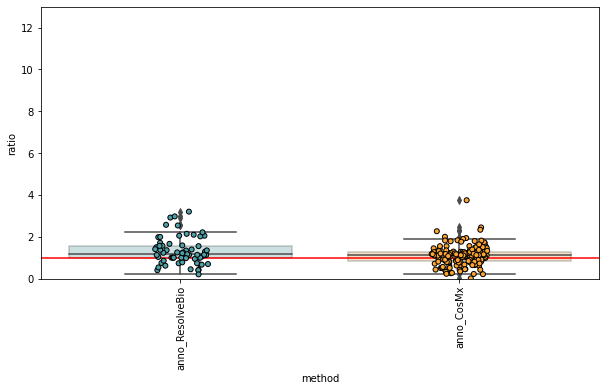

In [99]:
df_list = []
for key in means.keys():
    genes_SS = genes_s[key]
    mm = combine_med(means[key], tag = key)
    df_list.append(mm)
    mm['gene'] = genes_SS
df_con = pd.concat(df_list)
df_con['color'] = df_con.method.map(color_dicitonary)
df_con.to_csv('ratio_efficiency_in_thalamus.csv')
df_con_filt = df_con[df_con.method.isin(['anno_vizgen','anno_r1_multisection_Xenium','anno_ResolveBio','anno_CosMx'])]
with plt.rc_context({'figure.figsize': (10, 5)}):
    sns.boxplot(x="method", y="ratio",
             # colormap="Set3",# order=clarity_ranking,
               data=df_con_filt[df_con_filt.method != 'anno_scRNAseq'], palette=list(df_con_filt['color'].unique()), boxprops=dict(alpha=.3))
    sns.stripplot(x="method", y="ratio",edgecolor='black',
            linewidth=1,
             # colormap="Set3",# order=clarity_ranking,
               data=df_con_filt[df_con_filt.method != 'anno_scRNAseq'], palette=list(df_con_filt['color'].unique()))
    plt.ylim([0,13])
    plt.axhline(y = 1, color = 'r', linestyle = '-')
    plt.xticks(rotation = 90) # Rotates X-Axis Ticks by 45-degrees
    plt.show()

# PLOT FOR ALL METHODS [THALAMUS]

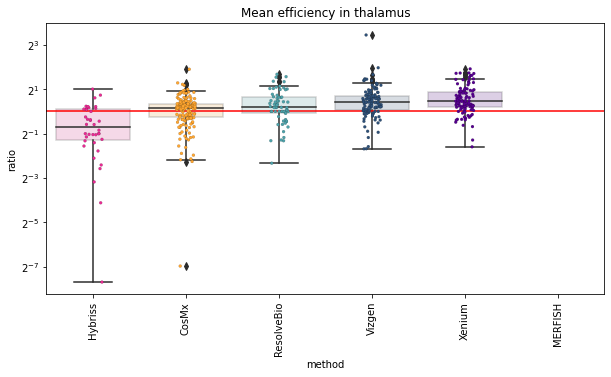

In [100]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
df_con['method'] = df_con['method'].str.replace('anno_', '')
df_con['method'] = df_con['method'].str.replace('r1_multisection_', '')
mean_by_category = df_con.groupby('method')['ratio'].mean().sort_values(ascending = True)
with plt.rc_context({'figure.figsize': (10, 5)}):
    fig,ax=plt.subplots()
    sns.boxplot(x="method", y="ratio",
             # colormap="Set3",# order=clarity_ranking,
               data=df_con[df_con.method != 'scRNAseq'], palette=[color_dicitonary['anno_'+indi] for indi in mean_by_category.index], boxprops=dict(alpha=.2), order = mean_by_category.index)
    sns.stripplot(x="method", y="ratio",edgecolor='black',
            linewidth=0.1,s = 3,
             # colormap="Set3",# order=clarity_ranking,
               data=df_con[df_con.method != 'scRNAseq'], palette=[color_dicitonary['anno_'+indi] for indi in mean_by_category.index],order = mean_by_category.index)
    #plt.ylim([0.5,13])
    plt.axhline(y = 1, color = 'r', linestyle = '-')
    ax.set_yscale('log', base=2)
    plt.xticks(rotation = 90) # Rotates X-Axis Ticks by 45-degrees
   # plt.yscale('log', basey=2)
    plt.title('Mean efficiency in thalamus')
#    plt.show()
    plt.savefig('../../figures/2.comparison_between_datasets/ratios_vs_sc/ratios_version_thalamus_resegmented_segmentation.pdf')

In [101]:
df_con.to_csv('../../figures/2.comparison_between_datasets/ratios_vs_sc/ratios_version_thalamus_resegmented_segmentation.csv')

In [102]:
df_con=pd.read_csv('../../figures/2.comparison_between_datasets/ratios_vs_sc/ratios_version_thalamus_resegmented_segmentation.csv')

# Additionally, we plot all regions together for visualization purposes

In [103]:
cortical_clusters=['D: CTX','L1', 'L2/3', 'L4', 'L5' ,'L6a' ,'L6b','L1', 'L2/3', 'L4', 'L5' ,'L6a', 'L6b',
 'AUD1', 'AUD2' ,'AUD2/3', 'AUD4', 'AUD5', 'AUD6a', 'AUD6b', 'MO1', 'MO2', 'MO2-3' ,'MO5','MO6a', 'MO6b',
'SSp1', 'SSp2', 'SSp2/3', 'SSp4', 'SSp5', 'SSp6a','SSp6b','Isocortex','D: CTX','D: CTX [1]']

thal_clusters=['APN','CM','m/c','IMD','PVT','MH','sm','LH','VAL','PCN','I','CL','LD','PO','VPM','VPL','RT',
               'LGv','LP','PF','PO','RT','ZI','LD','MD','VPL','VAL','VPM','VPL','LGd','LH','LP','MH','RT',
               'SPF','TH','THA','D: TH','D: THA','em','ml']

hip_clusters=['D: CA','CA1-slm', 'CA1-so', 'CA1-sp', 'CA1-sr', 'CA2-slm', 'CA2-so', 'CA2-sp' ,'CA2-sr',
 'CA3-slm', 'CA3-slu', 'CA3-so', 'CA3-sp' ,'CA3-sr','DG-mo' ,'DG-po','DG-sg','so','slm','sg','HIP','D: HPF',
'D: HPF [1]','slu','po','sg','slm','slu','mo','so','sp3','sp1/2','D: HPF','HPF','sp','sg','sr','sg' ,'slm',
              'so', 'sp1', 'sp2/3', 'sr']

anno_CosMx


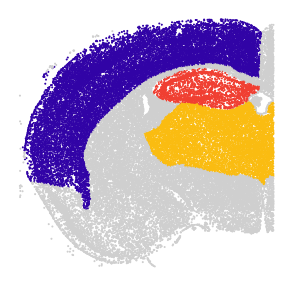

anno_Hybriss


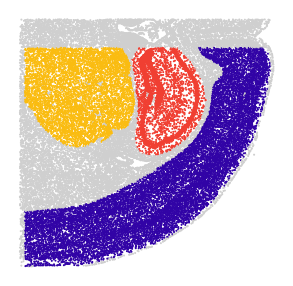

anno_MERFISH


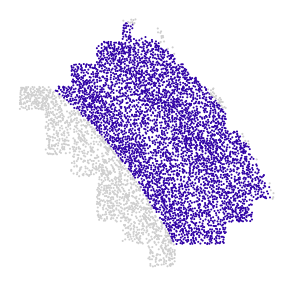

anno_ResolveBio


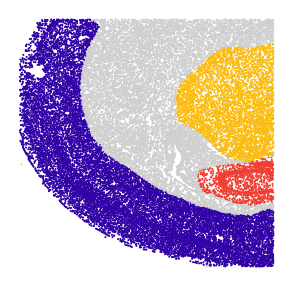

anno_Vizgen


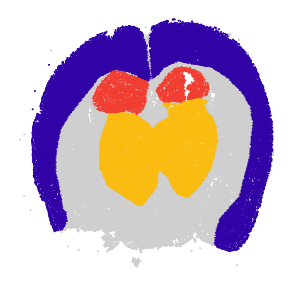

anno_Xenium


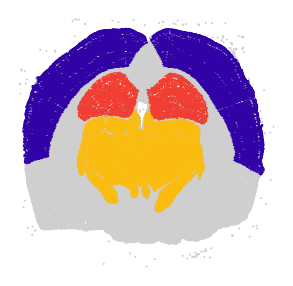

anno_scRNAseq


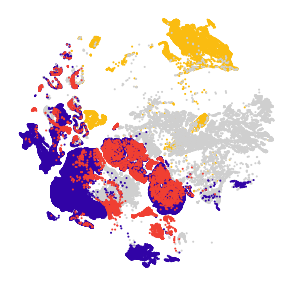

In [104]:
for aa in  adata_dict_all.keys():
    try:
        print(aa)
        plt.figure(figsize=(5,5))
        adata_dict_all[aa].obs['ROI']='nan'
        adata_dict_all[aa].obs.loc[adata_dict_all[aa].obs['spatial annotation'].isin(hip_clusters),'ROI']='hip'
        adata_dict_all[aa].obs.loc[adata_dict_all[aa].obs['spatial annotation'].isin(cortical_clusters),'ROI']='ctx'
        adata_dict_all[aa].obs.loc[adata_dict_all[aa].obs['spatial annotation'].isin(thal_clusters),'ROI']='thal'
        plotdict={'hip':'#f03f32','nan':'#cfcfcf','ctx':'#3103a6','thal':'#fabc11'}
        adata_dict_all[aa].obs['color']=adata_dict_all[aa].obs['ROI'].map(plotdict)
        plt.scatter(adata_dict_all[aa].obs['x'],adata_dict_all[aa].obs['y'],c=adata_dict_all[aa].obs['color'],s=1)       
        plt.axis('off')
        plt.savefig('../../figures/2.comparison_between_datasets/ratios_vs_sc/ROI_3REGS_'+str(aa)+'.png')
        plt.show()
    except:
        print('not possible')